In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import math
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.style as style

In [33]:
# Set the plot style
style.use('seaborn-poster')
style.use('ggplot')

In [2]:
# Load the data
df = pd.read_csv("2021-11-08_wta_hike_data.csv")

In [4]:
df.head()

TITLE              REGION             SPECIFIC REGION  \
0     Sawtooth Ridge  Eastern Washington  Palouse and Blue Mountains   
1  Rattlesnake Trail  Eastern Washington  Palouse and Blue Mountains   
2       Oregon Butte  Eastern Washington  Palouse and Blue Mountains   
3       Mount Misery  Eastern Washington  Palouse and Blue Mountains   
4       Dexter Ridge  Eastern Washington  Palouse and Blue Mountains   

   DISTANCE  DIST_TYPE    GAIN  HIGHEST  RATING  RATING_COUNT   LATITUDE  ...  \
0       8.0  roundtrip   500.0   5500.0    2.67             3  46.061784  ...   
1      10.0  roundtrip  2900.0   5700.0    3.43             7  46.204339  ...   
2       6.0  roundtrip   987.0   6387.0    4.14             7  46.118332  ...   
3      16.0  roundtrip  1000.0   6401.0    2.75             4  46.118201  ...   
4       5.0    one-way  2547.0   5500.0    0.00             0  46.021522  ...   

   MOUNTAIN VIEWS SUMMITS  WILDLIFE  RIDGES  ESTABLISHED CAMPSITES  \
0               1       0         0       1                      0   
1               1       1         0       1                      1   
2               1       1         1       1                      1   
3               1       1         1       1                      1   
4               0       0         0       0                      0   

   DOGS ALLOWED ON LEASH  NO DOGS  KID FRIENDLY        REQUIRED PASSES  \
0                      0        0             1                No pass   
1                      1        0             0                No pass   
2                      1        0             0  Northwest Forest Pass   
3                      1        0             1  Northwest Forest Pass   
4                      0        0             0  Northwest Forest Pass   

                                                 URL  
0  https://www.wta.org/go-hiking/hikes/sawtooth-r...  
1  https://www.wta.org/go-hiking/hikes/rattlesnak...  
2   https://www.wta.org/go-hiking/hikes/oregon-butte  
3   https://www.wta.org/go-hiking/hikes/mount-misery  
4   https://www.wta.org/go-hiking/hikes/dexter-ridge  

[5 rows x 30 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3898 entries, 0 to 3897
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TITLE                    3898 non-null   object 
 1   REGION                   3898 non-null   object 
 2   SPECIFIC REGION          3384 non-null   object 
 3   DISTANCE                 2778 non-null   float64
 4   DIST_TYPE                2765 non-null   object 
 5   GAIN                     2325 non-null   float64
 6   HIGHEST                  2399 non-null   float64
 7   RATING                   3898 non-null   float64
 8   RATING_COUNT             3898 non-null   int64  
 9   LATITUDE                 3170 non-null   float64
 10  LONGITUDE                3170 non-null   float64
 11  MOST_RECENT_REPORT_DATE  3709 non-null   object 
 12  REPORT_COUNT             3898 non-null   int64  
 13  COAST                    3898 non-null   int64  
 14  RIVERS                  

In [8]:
df.columns

Index(['TITLE', 'REGION', 'SPECIFIC REGION', 'DISTANCE', 'DIST_TYPE', 'GAIN',
       'HIGHEST', 'RATING', 'RATING_COUNT', 'LATITUDE', 'LONGITUDE',
       'MOST_RECENT_REPORT_DATE', 'REPORT_COUNT', 'COAST', 'RIVERS', 'LAKES',
       'WATERFALLS', 'OLD GROWTH', 'FALL FOLIAGE', 'WILDFLOWERS/MEADOWS',
       'MOUNTAIN VIEWS', 'SUMMITS', 'WILDLIFE', 'RIDGES',
       'ESTABLISHED CAMPSITES', 'DOGS ALLOWED ON LEASH', 'NO DOGS',
       'KID FRIENDLY', 'REQUIRED PASSES', 'URL'],
      dtype='object')

## Exploratory data analysis

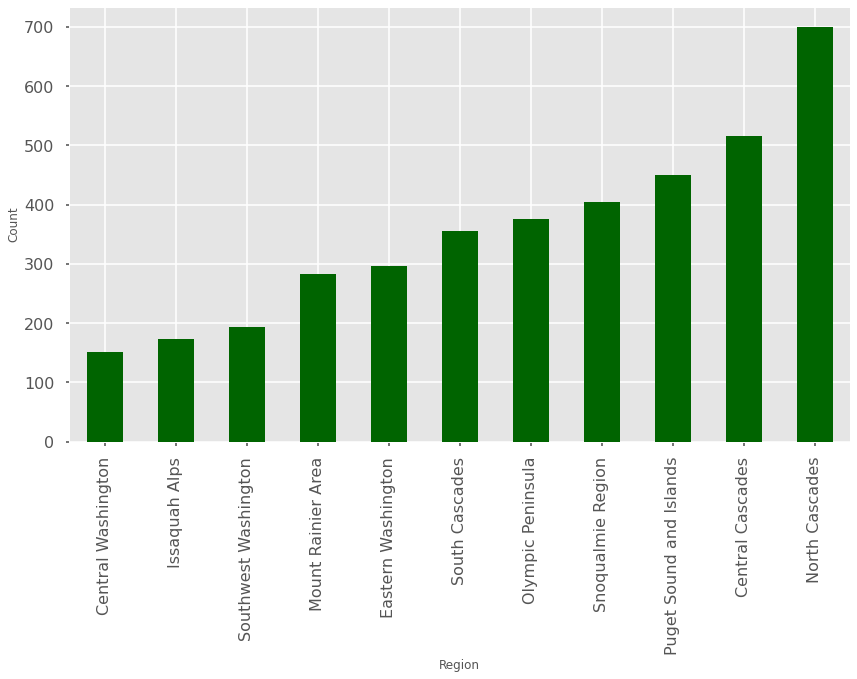

In [52]:
# Distribution of hikes throughout WA
fig = plt.figure(figsize=(14, 8))
fig = df['REGION'].value_counts().sort_values().plot(kind='bar', color='darkgreen')
plt.xlabel("Region")
plt.ylabel("Count")
#plt.xticks(rotation="40")
plt.show()

In [29]:
# How many specific regions are there?
df['SPECIFIC REGION'].nunique()

50

Eastern Washington


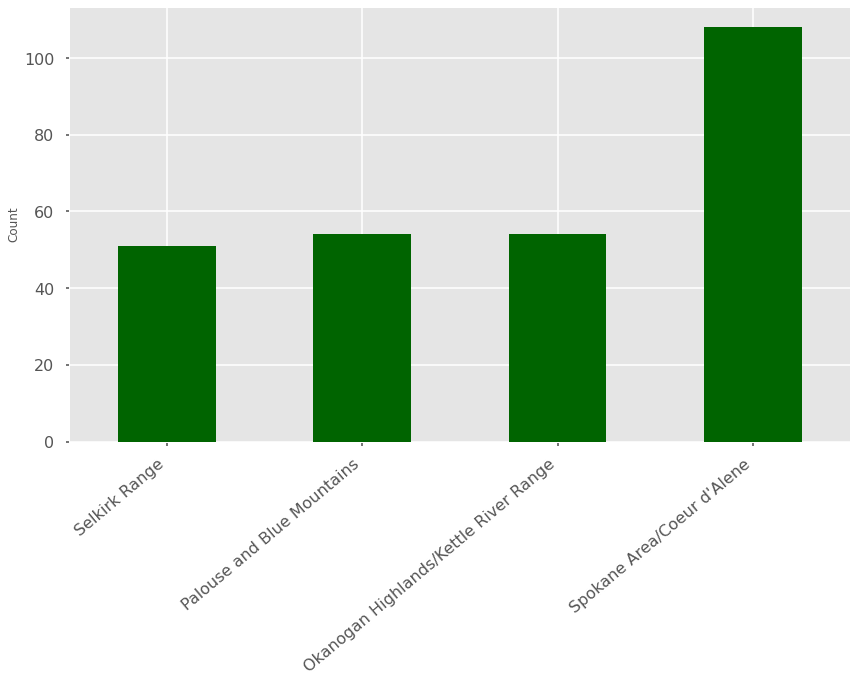

Snoqualmie Region


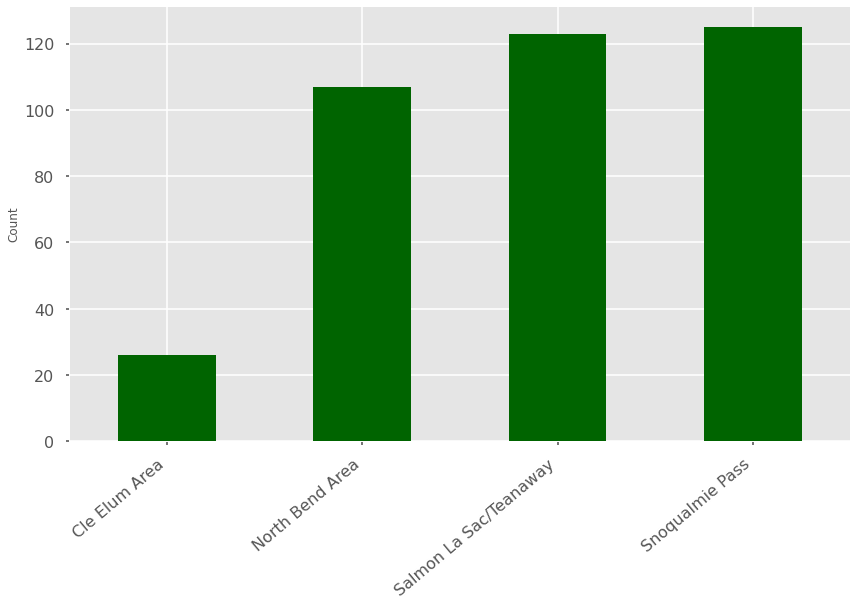

Central Washington


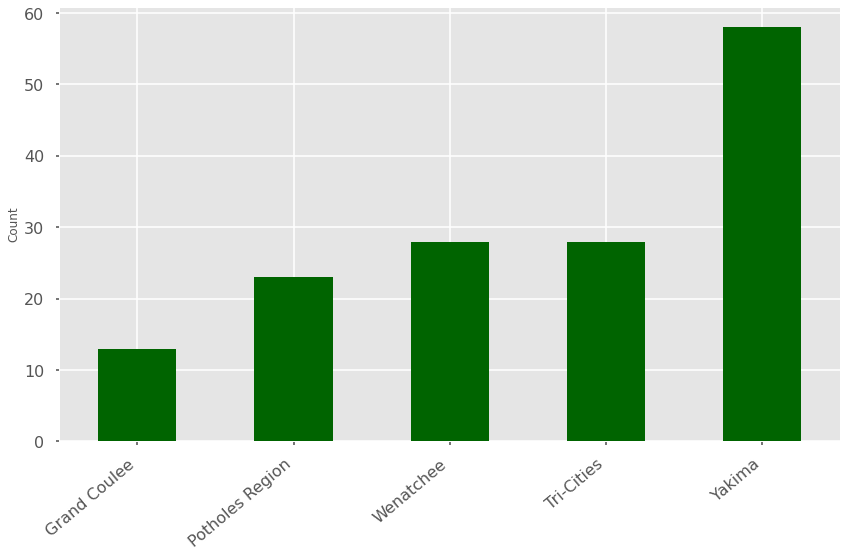

Southwest Washington


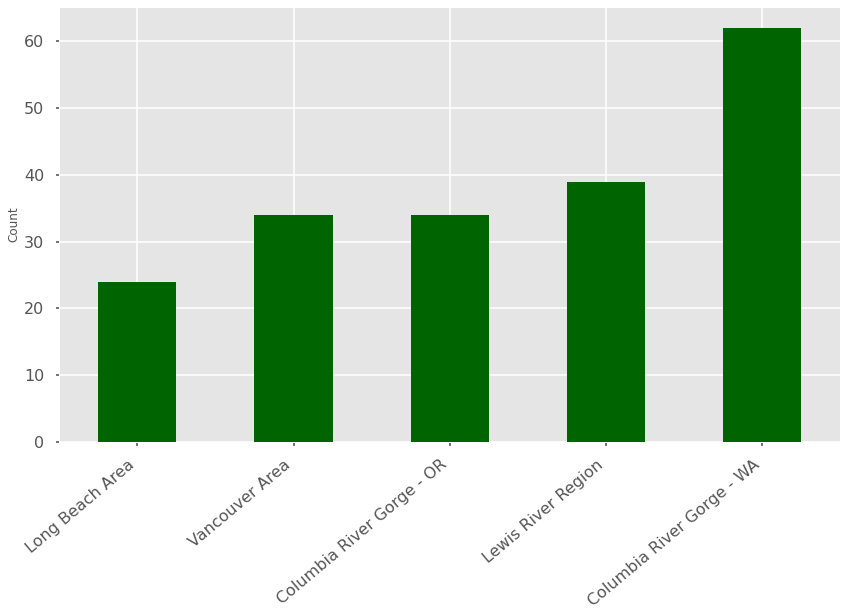

South Cascades


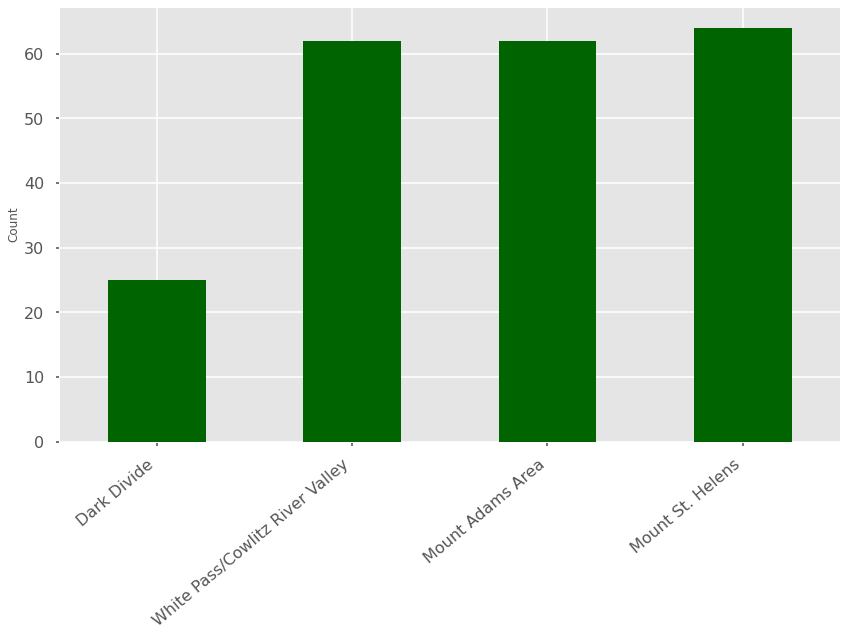

North Cascades


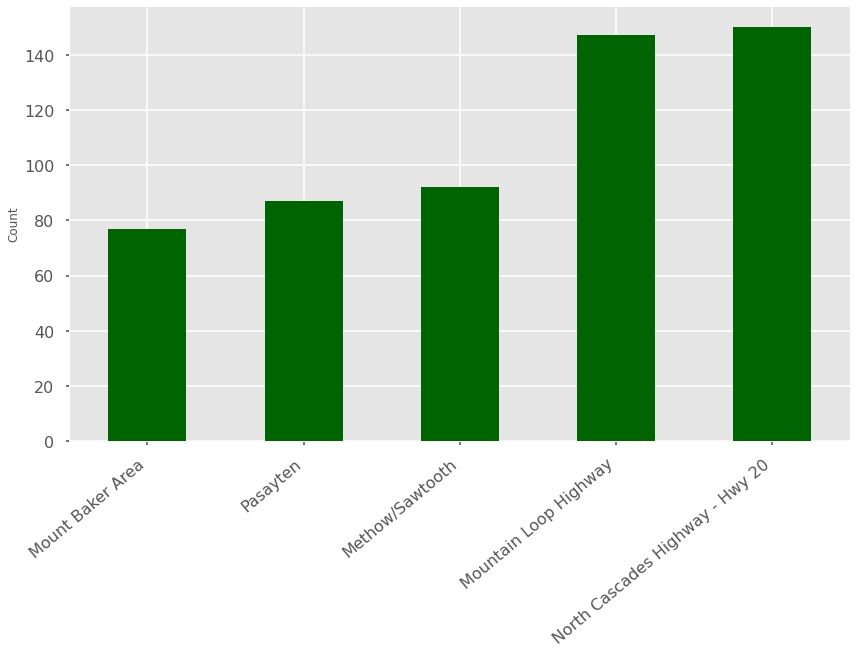

Olympic Peninsula


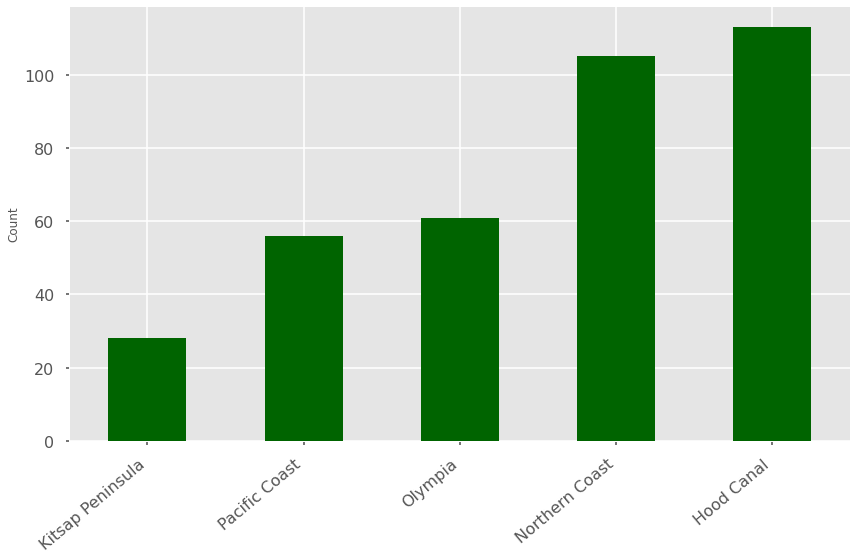

Central Cascades


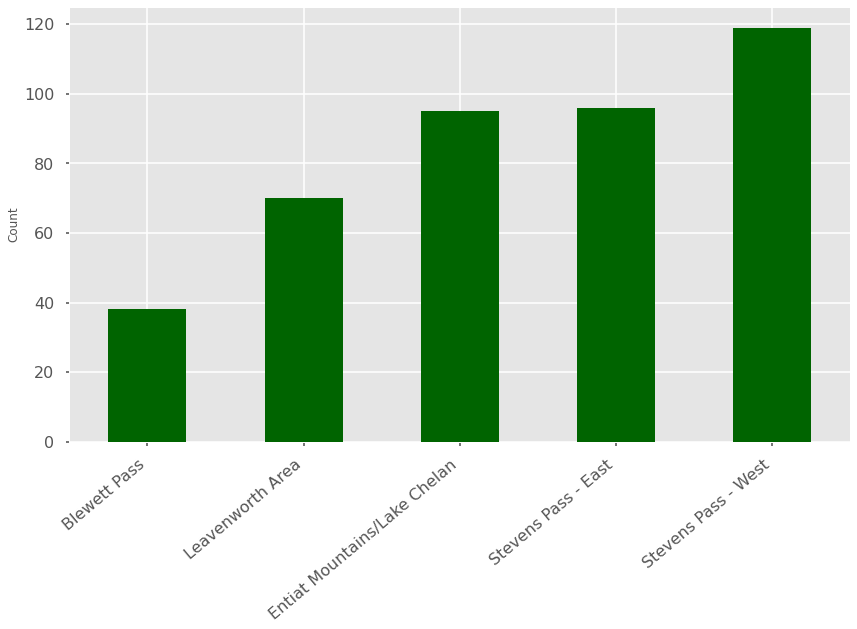

Puget Sound and Islands


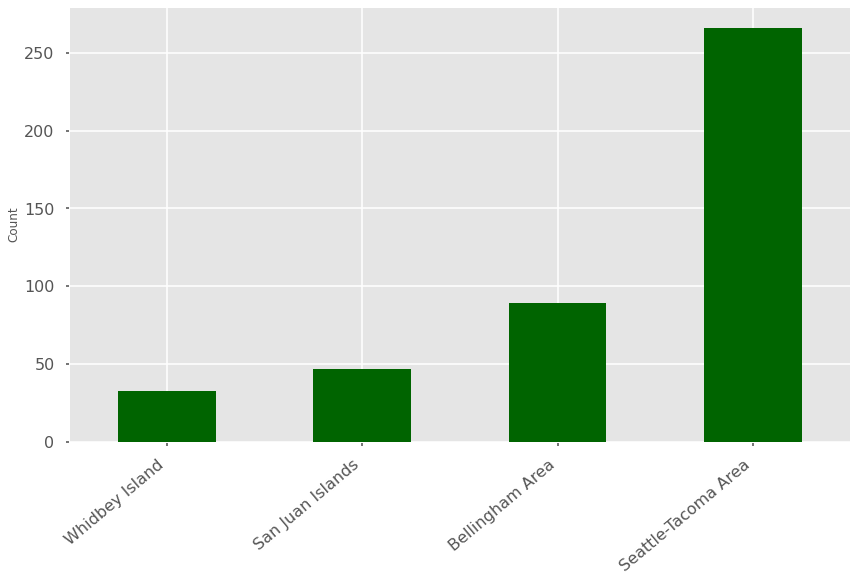

Issaquah Alps


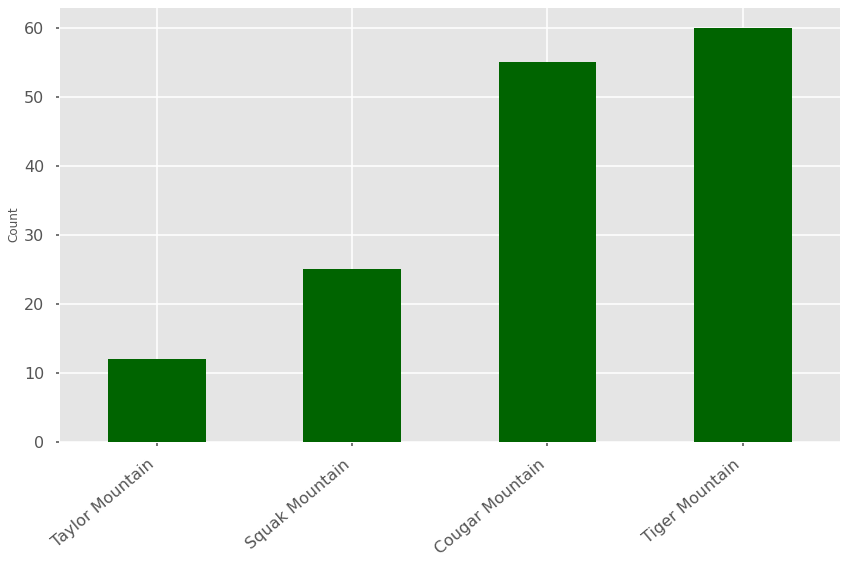

Mount Rainier Area


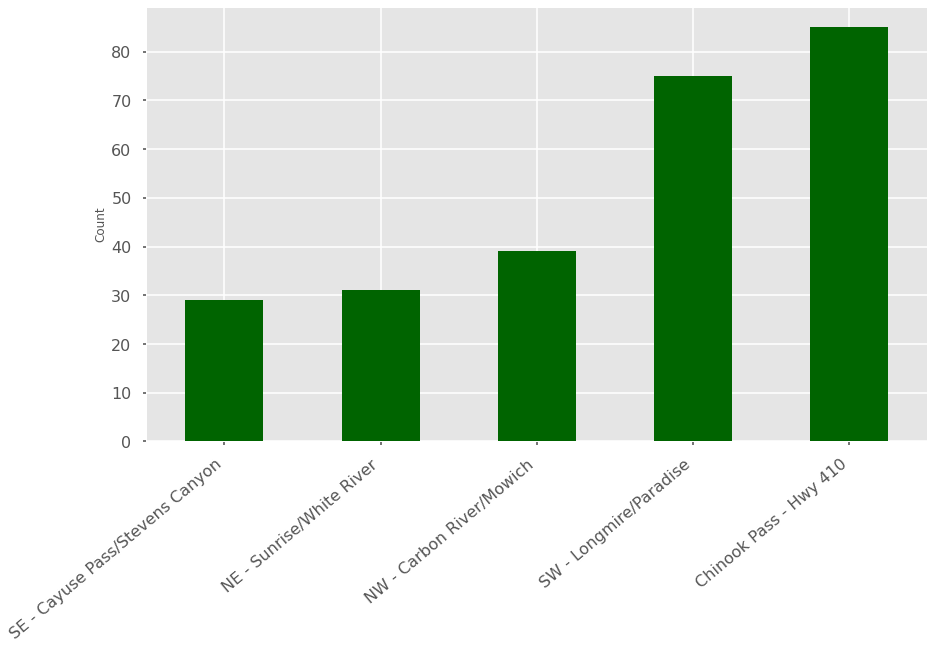

In [149]:
# How many unique specific regions are there per region and what are the distributions like?
for region in df['REGION'].unique():
    print(region)
    fig = plt.figure(figsize=(14, 8))
    fig = df[df['REGION'] == region]['SPECIFIC REGION'].value_counts().sort_values().plot(kind='bar', color='darkgreen')
    plt.ylabel("Count")
    plt.xticks(rotation="40", ha='right')
    plt.show()

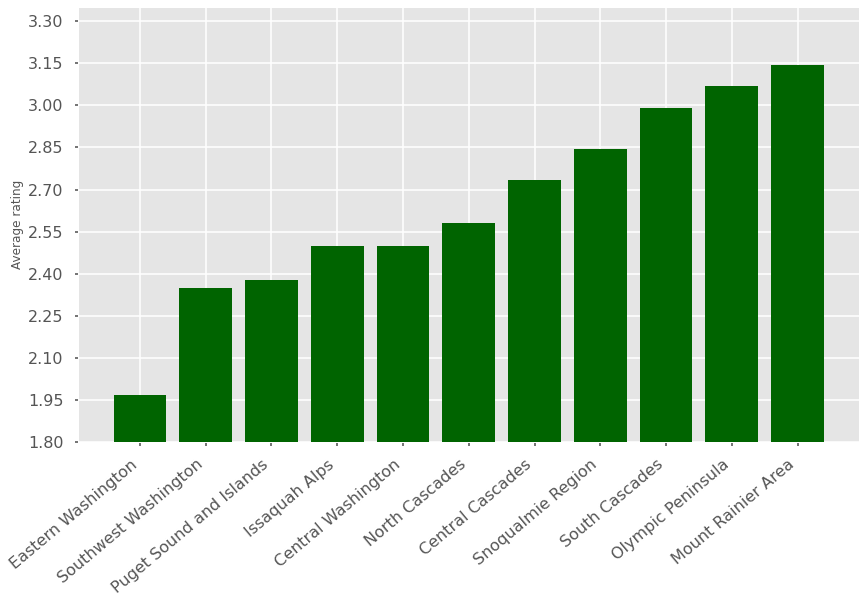

In [43]:
# Which regions have the highest rated hikes? ie where are the most popular hikes?
dic = {}
for region in df["REGION"].unique():
    mean = df[df['REGION'] == region]['RATING'].mean()
    dic[region] = mean
avg_ratings=dict(sorted(dic.items(), key=lambda item: item[1]))
fig = plt.figure(figsize=(14,8))
plt.bar(avg_ratings.keys(), avg_ratings.values(), color='darkgreen')
plt.ylim(1.8, 3.35)
plt.yticks(np.arange(1.8, 3.35, 0.15))
plt.ylabel("Average rating")
plt.xticks(rotation="40", ha='right')
plt.show()

In [55]:
# Function that gets the top n hikes based off rating and rating count 
def get_top_k_hikes(df, n):
    most_pop = []
    df = df.dropna(axis=0, how='any', subset=['RATING', 'RATING_COUNT'])
    sorted_df = df.sort_values(by=['RATING']).sort_values(by=['RATING_COUNT'])
    return sorted_df.iloc[(n*-1)-1:-1]

In [68]:
# What are the most popular hikes?
top_20_hikes = get_top_k_hikes(df, 20)
top_20_hikes

TITLE                   REGION  \
3766      Talapus and Olallie Lakes        Snoqualmie Region   
1310                      Goat Lake           North Cascades   
584                   Poo Poo Point            Issaquah Alps   
2644                  Boulder River           North Cascades   
3515               The Enchantments         Central Cascades   
1298               Granite Mountain        Snoqualmie Region   
2130  Ira Spring Trail - Mason Lake        Snoqualmie Region   
767        Mailbox Peak - Old Trail        Snoqualmie Region   
3560                   Heather Lake           North Cascades   
2647                    Blanca Lake         Central Cascades   
2145                    Oyster Dome  Puget Sound and Islands   
1348                      Little Si        Snoqualmie Region   
2556                 Mount Pilchuck           North Cascades   
3478                      Snow Lake        Snoqualmie Region   
2562                   Annette Lake        Snoqualmie Region   
3268                     Twin Falls        Snoqualmie Region   
3291                       Mount Si        Snoqualmie Region   
3751       Wallace Falls State Park         Central Cascades   
3543                        Lake 22           North Cascades   
3494              Rattlesnake Ledge        Snoqualmie Region   

            SPECIFIC REGION  DISTANCE  DIST_TYPE    GAIN  HIGHEST  RATING  \
3766        Snoqualmie Pass       6.2  roundtrip  1220.0   3780.0    3.92   
1310  Mountain Loop Highway      10.4  roundtrip  1400.0   3161.0    4.21   
584          Tiger Mountain       7.2  roundtrip  1748.0   2021.0    3.83   
2644  Mountain Loop Highway       8.6  roundtrip   700.0   1550.0    3.93   
3515       Leavenworth Area      18.0    one-way  4500.0   7800.0    4.70   
1298        Snoqualmie Pass       8.6  roundtrip  3800.0   5629.0    4.45   
2130        Snoqualmie Pass       6.5  roundtrip  2420.0   4320.0    4.18   
767         North Bend Area       5.4  roundtrip  4000.0   4822.0    4.41   
3560  Mountain Loop Highway       4.6  roundtrip  1034.0   2430.0    3.99   
2647    Stevens Pass - West       7.5  roundtrip  3300.0   4600.0    4.44   
2145        Bellingham Area       5.0  roundtrip  1050.0   2025.0    4.10   
1348        North Bend Area       3.7  roundtrip  1300.0   1550.0    3.60   
2556  Mountain Loop Highway       5.4  roundtrip  2300.0   5327.0    4.58   
3478        Snoqualmie Pass       7.2  roundtrip  1800.0   4400.0    4.19   
2562        Snoqualmie Pass       7.5  roundtrip  1800.0   3600.0    3.84   
3268        North Bend Area       2.6  roundtrip   500.0   1000.0    4.13   
3291        North Bend Area       8.0  roundtrip  3150.0   3900.0    4.01   
3751    Stevens Pass - West       5.6  roundtrip  1300.0   1500.0    4.11   
3543  Mountain Loop Highway       5.4  roundtrip  1350.0   2400.0    4.26   
3494        North Bend Area       4.0  roundtrip  1160.0   2078.0    4.03   

      RATING_COUNT   LATITUDE  ...  MOUNTAIN VIEWS SUMMITS  WILDLIFE  RIDGES  \
3766           120  47.401254  ...               1       0         1       0   
1310           121  48.053667  ...               0       0         0       0   
584            121  47.524613  ...               1       0         1       0   
2644           123  48.250883  ...               0       0         0       0   
3515           125  47.527892  ...               1       1         1       1   
1298           127  47.397900  ...               1       1         0       0   
2130           133  47.425717  ...               1       0         0       1   
767            137  47.467417  ...               1       1         0       0   
3560           142  48.082883  ...               1       0         0       0   
2647           142  47.915367  ...               1       1         0       0   
2145           155  48.609635  ...               1       1         1       0   
1348           176  47.486652  ...               1       0         0       0   
2556           186  48.0702

In [90]:
# What is the most abundant physical feature of trails? Least abundant?
physical_features = {}
for column in np.arange(13, 24, 1):
    count = np.count_nonzero(df.iloc[:, column].values)
    physical_features[df.iloc[:, column].name] = count

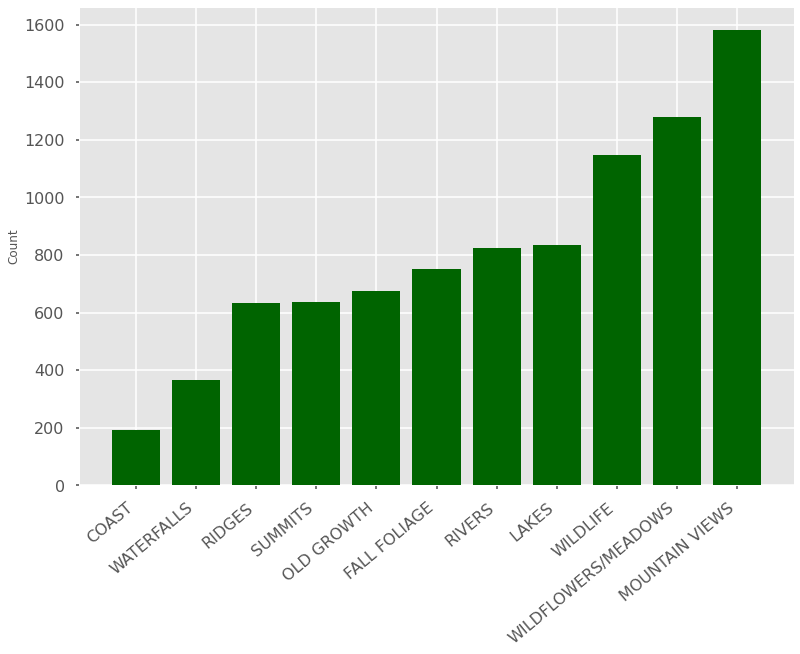

In [92]:
physical_features = dict(sorted(physical_features.items(), key=lambda item: item[1]))
plt.bar(physical_features.keys(), physical_features.values(), color='darkgreen')
#plt.ylim(1.8, 3.35)
#plt.yticks(np.arange(1.8, 3.35, 0.15))
plt.ylabel("Count")
plt.xticks(rotation="40", ha='right')
plt.show()

In [101]:
# Missing data?
df.isna().sum()

TITLE                         0
REGION                        0
SPECIFIC REGION             514
DISTANCE                   1120
DIST_TYPE                  1133
GAIN                       1573
HIGHEST                    1499
RATING                        0
RATING_COUNT                  0
LATITUDE                    728
LONGITUDE                   728
MOST_RECENT_REPORT_DATE     189
REPORT_COUNT                  0
COAST                         0
RIVERS                        0
LAKES                         0
WATERFALLS                    0
OLD GROWTH                    0
FALL FOLIAGE                  0
WILDFLOWERS/MEADOWS           0
MOUNTAIN VIEWS                0
SUMMITS                       0
WILDLIFE                      0
RIDGES                        0
ESTABLISHED CAMPSITES         0
DOGS ALLOWED ON LEASH         0
NO DOGS                       0
KID FRIENDLY                  0
REQUIRED PASSES            1220
URL                           0
dtype: int64

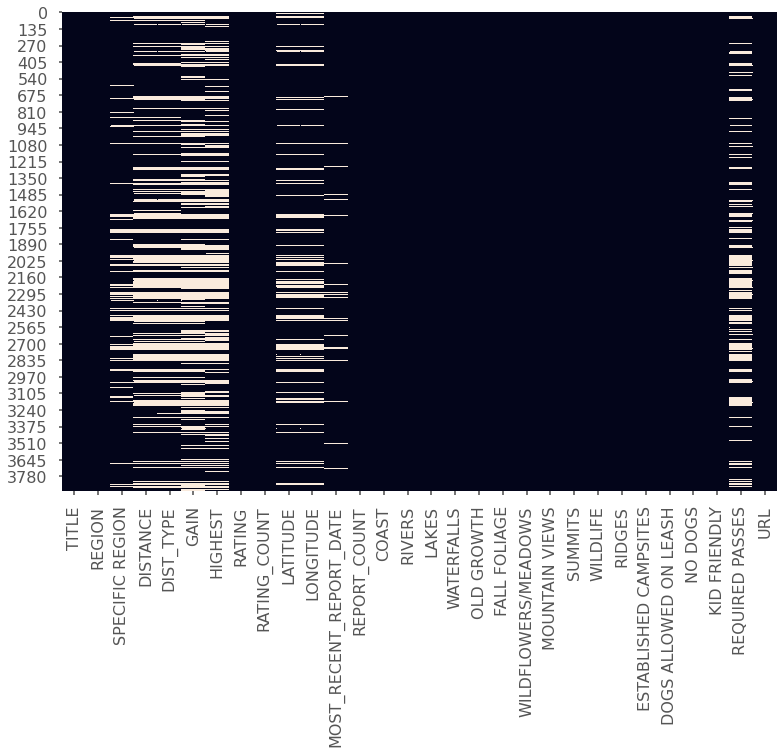

In [105]:
sns.heatmap(df.isnull(), cbar=False)
plt.show()

Let's drop all the features we don't want to clusters.

In [106]:
df.columns

Index(['TITLE', 'REGION', 'SPECIFIC REGION', 'DISTANCE', 'DIST_TYPE', 'GAIN',
       'HIGHEST', 'RATING', 'RATING_COUNT', 'LATITUDE', 'LONGITUDE',
       'MOST_RECENT_REPORT_DATE', 'REPORT_COUNT', 'COAST', 'RIVERS', 'LAKES',
       'WATERFALLS', 'OLD GROWTH', 'FALL FOLIAGE', 'WILDFLOWERS/MEADOWS',
       'MOUNTAIN VIEWS', 'SUMMITS', 'WILDLIFE', 'RIDGES',
       'ESTABLISHED CAMPSITES', 'DOGS ALLOWED ON LEASH', 'NO DOGS',
       'KID FRIENDLY', 'REQUIRED PASSES', 'URL'],
      dtype='object')

In [107]:
df_new = df.drop(['URL', 'TITLE', 'REQUIRED PASSES', 'DISTANCE', 'DIST_TYPE', 'GAIN', 'RATING_COUNT', 'REPORT_COUNT', 'MOST_RECENT_REPORT_DATE', 'RATING', 'DOGS ALLOWED ON LEASH', 'NO DOGS'], axis=1)

In [108]:
df_new

REGION             SPECIFIC REGION  HIGHEST   LATITUDE  \
0     Eastern Washington  Palouse and Blue Mountains   5500.0  46.061784   
1     Eastern Washington  Palouse and Blue Mountains   5700.0  46.204339   
2     Eastern Washington  Palouse and Blue Mountains   6387.0  46.118332   
3     Eastern Washington  Palouse and Blue Mountains   6401.0  46.118201   
4     Eastern Washington  Palouse and Blue Mountains   5500.0  46.021522   
...                  ...                         ...      ...        ...   
3893       Issaquah Alps                         NaN      NaN  47.533349   
3894   Snoqualmie Region      Salmon La Sac/Teanaway   2800.0  47.409338   
3895      South Cascades                         NaN   5712.0  46.422933   
3896  Central Washington                   Wenatchee   2400.0  47.399304   
3897    Central Cascades         Stevens Pass - West   5280.0  47.693675   

       LONGITUDE  COAST  RIVERS  LAKES  WATERFALLS  OLD GROWTH  FALL FOLIAGE  \
0    -117.844133      0       0      0           0           0             0   
1    -117.705824      0       0      0           0           0             0   
2    -117.714965      0       0      0           0           0             0   
3    -117.714360      0       0      0           0           0             0   
4    -117.790014      0       1      0           0           0             0   
...          ...    ...     ...    ...         ...         ...           ...   
3893 -122.170479      0       0      0           0           0             0   
3894 -121.106670      0       1      1           0           1             1   
3895 -121.500983      0       0      0           0           0             0   
3896 -120.395672      0       1      0           0           0             0   
3897 -121.426650      0       0      0           0           0             0   

      WILDFLOWERS/MEADOWS  MOUNTAIN VIEWS  SUMMITS  WILDLIFE  RIDGES  \
0                       1               1        0         0       1   
1                       1               1        1         0       1   
2                       1               1        1         1       1   
3                       1               1        1         1       1   
4                       0               0        0         0       0   
...                   ...             ...      ...       ...     ...   
3893                    0               0        0         0       0   
3894                    1               1        0         1       0   
3895                    1               1        0         0       0   
3896                    0               0        1         0       0   
3897                    0               0        1         0       0   

      ESTABLISHED CAMPSITES  KID FRIENDLY  
0                         0             1  
1                         1             0  
2                         1             0  
3                         1             1  
4                         0             0  
...                     ...           ...  
3893                      0             1  
3894                      1             1  
3895                      0             0  
3896                      0             0  
3897                      0             0  

[3898 rows x 18 columns]

In [109]:
df_new = df.dropna()

In [110]:
df_new

TITLE              REGION  \
0           Sawtooth Ridge  Eastern Washington   
1        Rattlesnake Trail  Eastern Washington   
2             Oregon Butte  Eastern Washington   
3             Mount Misery  Eastern Washington   
4             Dexter Ridge  Eastern Washington   
...                    ...                 ...   
3883           Craggy Peak      South Cascades   
3884  Cramer Lake Snowshoe      South Cascades   
3886  Corral Pass Snowshoe  Mount Rainier Area   
3889           County Line   Snoqualmie Region   
3894          Cooper River   Snoqualmie Region   

                      SPECIFIC REGION  DISTANCE  DIST_TYPE    GAIN  HIGHEST  \
0          Palouse and Blue Mountains       8.0  roundtrip   500.0   5500.0   
1          Palouse and Blue Mountains      10.0  roundtrip  2900.0   5700.0   
2          Palouse and Blue Mountains       6.0  roundtrip   987.0   6387.0   
3          Palouse and Blue Mountains      16.0  roundtrip  1000.0   6401.0   
4          Palouse and Blue Mountains       5.0    one-way  2547.0   5500.0   
...                               ...       ...        ...     ...      ...   
3883                      Dark Divide      11.0  roundtrip  1800.0   5275.0   
3884  White Pass/Cowlitz River Valley       7.0  roundtrip   840.0   5080.0   
3886           Chinook Pass - Hwy 410      11.5  roundtrip  2800.0   5700.0   
3889           Salmon La Sac/Teanaway      10.0  roundtrip  1875.0   5700.0   
3894           Salmon La Sac/Teanaway       7.8  roundtrip   400.0   2800.0   

      RATING  RATING_COUNT   LATITUDE  ...  MOUNTAIN VIEWS SUMMITS  WILDLIFE  \
0       2.67             3  46.061784  ...               1       0         0   
1       3.43             7  46.204339  ...               1       1         0   
2       4.14             7  46.118332  ...               1       1         1   
3       2.75             4  46.118201  ...               1       1         1   
4       0.00             0  46.021522  ...               0       0         0   
...      ...           ...        ...  ...             ...     ...       ...   
3883    3.17             6  46.213350  ...               1       0         0   
3884    4.00             2  46.654856  ...               1       0         0   
3886    0.00             0  46.999456  ...               1       1         0   
3889    3.20             5  47.359271  ...               1       0         0   
3894    3.36            11  47.409338  ...               1       0         1   

      RIDGES  ESTABLISHED CAMPSITES  DOGS ALLOWED ON LEASH  NO DOGS  \
0          1                      0                      0        0   
1          1                      1                      1        0   
2          1                      1                      1        0   
3          1                      1                      1        0   
4          0                      0                      0        0   
...      ...                    ...                    ...      ...   
3883       1                      0                      0        0   
3884       0                      0                      1        0   
3886       0                      0                      0        0   
3889       1                      0                      1        0   
3894       0                      1                      1        0   

      KID FRIENDLY        REQUIRED PASSES  \
0                1                No pass   
1                0                No pass   
2                0  Northwest Forest Pass   
3                1  Northwest Forest Pass   
4                0  Northwest Forest Pass   
...            ...                    ...   
3883             0  Northwest Forest Pass   
3884             0                No pass   
3886             0                No pass   
3889             0  Northwest Forest Pass   
3894             1  Northwest Forest Pass   

                                                    URL  
0     https://www.wta.org/go-hiking/hikes/sawtooth-r...  


In [21]:
# Convert dist, dist_type, and gain to one difficulty measure
df["DIFFICULTY"] = ""
for i in df.index:
    dist = df.at[i, 'DISTANCE']
    gain = df.at[i, 'GAIN']
    if df.at[i, 'DIST_TYPE'] == 'one-way':
        dist = dist * 2
    val = math.sqrt(gain * 2 * dist)
    if val < 50:
        difficulty = 'easy'
    elif val >= 50 and val < 100:
        difficulty = 'moderate'
    elif val >= 100 and val < 150:
        difficulty = 'moderately strenuous'
    elif val >= 150 and val < 200:
        difficulty = 'strenuous'
    elif val > 200:
        difficulty = 'very strenuous'
    else:
        difficulty = float("NaN")
    df.at[i, 'DIFFICULTY'] = difficulty

In [22]:
df

TITLE              REGION             SPECIFIC REGION  \
0         Sawtooth Ridge  Eastern Washington  Palouse and Blue Mountains   
1      Rattlesnake Trail  Eastern Washington  Palouse and Blue Mountains   
2           Oregon Butte  Eastern Washington  Palouse and Blue Mountains   
3           Mount Misery  Eastern Washington  Palouse and Blue Mountains   
4           Dexter Ridge  Eastern Washington  Palouse and Blue Mountains   
...                  ...                 ...                         ...   
3893         China Creek       Issaquah Alps                         NaN   
3894        Cooper River   Snoqualmie Region      Salmon La Sac/Teanaway   
3895   Coleman Weedpatch      South Cascades                         NaN   
3896        Chopper Peak  Central Washington                   Wenatchee   
3897  Cleveland Mountain    Central Cascades         Stevens Pass - West   

      DISTANCE  DIST_TYPE    GAIN  HIGHEST  RATING  RATING_COUNT   LATITUDE  \
0          8.0  roundtrip   500.0   5500.0    2.67             3  46.061784   
1         10.0  roundtrip  2900.0   5700.0    3.43             7  46.204339   
2          6.0  roundtrip   987.0   6387.0    4.14             7  46.118332   
3         16.0  roundtrip  1000.0   6401.0    2.75             4  46.118201   
4          5.0    one-way  2547.0   5500.0    0.00             0  46.021522   
...        ...        ...     ...      ...     ...           ...        ...   
3893       0.8    one-way     NaN      NaN    3.40             5  47.533349   
3894       7.8  roundtrip   400.0   2800.0    3.36            11  47.409338   
3895       9.0     trails  1900.0   5712.0    2.60             5  46.422933   
3896       3.0  roundtrip  1440.0   2400.0    3.00             1  47.399304   
3897      12.0  roundtrip     NaN   5280.0    1.00             1  47.693675   

      ...  SUMMITS WILDLIFE  RIDGES  ESTABLISHED CAMPSITES  \
0     ...        0        0       1                      0   
1     ...        1        0       1                      1   
2     ...        1        1       1                      1   
3     ...        1        1       1                      1   
4     ...        0        0       0                      0   
...   ...      ...      ...     ...                    ...   
3893  ...        0        0       0                      0   
3894  ...        0        1       0                      1   
3895  ...        0        0       0                      0   
3896  ...        1        0       0                      0   
3897  ...        1        0       0                      0   

      DOGS ALLOWED ON LEASH  NO DOGS  KID FRIENDLY        REQUIRED PASSES  \
0                         0        0             1                No pass   
1                         1        0             0                No pass   
2                         1        0             0  Northwest Forest Pass   
3                         1        0             1  Northwest Forest Pass   
4                         0        0             0  Northwest Forest Pass   
...                     ...      ...           ...                    ...   
3893                      0        0             1                No pass   
3894                      1        0             1  Northwest Forest Pass   
3895                      0        0             0                No pass   
3896                      0        0             0                    NaN   
3897                      0        0             0  Northwest Forest Pass   

                                                    URL            DIFFICULTY  
0     https://www.wta.org/go-hiking/hikes/sawtooth-r...              moderate  
1     https://www.wta.org/go-hiking/hikes/rattlesnak...        very strenuous  
2      https://www.wta.org/go-hiking/hikes/oregon-butte  moderately strenuous  
3      https://www.wta.org/go-hiking/hikes/mount-misery             strenuous  
4      https://www.wta.org/go-hiking/hikes/dexter-ridge        very strenuous  
...    

In [8]:
df = df.dropna()
df = df.reset_index()

In [9]:
df

TITLE              REGION  \
0           Sawtooth Ridge  Eastern Washington   
1        Rattlesnake Trail  Eastern Washington   
2             Oregon Butte  Eastern Washington   
3             Mount Misery  Eastern Washington   
4             Dexter Ridge  Eastern Washington   
...                    ...                 ...   
3883           Craggy Peak      South Cascades   
3884  Cramer Lake Snowshoe      South Cascades   
3886  Corral Pass Snowshoe  Mount Rainier Area   
3889           County Line   Snoqualmie Region   
3894          Cooper River   Snoqualmie Region   

                      SPECIFIC REGION  DISTANCE  DIST_TYPE    GAIN  HIGHEST  \
0          Palouse and Blue Mountains       8.0  roundtrip   500.0   5500.0   
1          Palouse and Blue Mountains      10.0  roundtrip  2900.0   5700.0   
2          Palouse and Blue Mountains       6.0  roundtrip   987.0   6387.0   
3          Palouse and Blue Mountains      16.0  roundtrip  1000.0   6401.0   
4          Palouse and Blue Mountains       5.0    one-way  2547.0   5500.0   
...                               ...       ...        ...     ...      ...   
3883                      Dark Divide      11.0  roundtrip  1800.0   5275.0   
3884  White Pass/Cowlitz River Valley       7.0  roundtrip   840.0   5080.0   
3886           Chinook Pass - Hwy 410      11.5  roundtrip  2800.0   5700.0   
3889           Salmon La Sac/Teanaway      10.0  roundtrip  1875.0   5700.0   
3894           Salmon La Sac/Teanaway       7.8  roundtrip   400.0   2800.0   

      RATING  RATING_COUNT   LATITUDE  ...  SUMMITS WILDLIFE  RIDGES  \
0       2.67             3  46.061784  ...        0        0       1   
1       3.43             7  46.204339  ...        1        0       1   
2       4.14             7  46.118332  ...        1        1       1   
3       2.75             4  46.118201  ...        1        1       1   
4       0.00             0  46.021522  ...        0        0       0   
...      ...           ...        ...  ...      ...      ...     ...   
3883    3.17             6  46.213350  ...        0        0       1   
3884    4.00             2  46.654856  ...        0        0       0   
3886    0.00             0  46.999456  ...        1        0       0   
3889    3.20             5  47.359271  ...        0        0       1   
3894    3.36            11  47.409338  ...        0        1       0   

      ESTABLISHED CAMPSITES  DOGS ALLOWED ON LEASH  NO DOGS  KID FRIENDLY  \
0                         0                      0        0             1   
1                         1                      1        0             0   
2                         1                      1        0             0   
3                         1                      1        0             1   
4                         0                      0        0             0   
...                     ...                    ...      ...           ...   
3883                      0                      0        0             0   
3884                      0                      1        0             0   
3886                      0                      0        0             0   
3889                      0                      1        0             0   
3894                      1                      1        0             1   

            REQUIRED PASSES  \
0                   No pass   
1                   No pass   
2     Northwest Forest Pass   
3     Northwest Forest Pass   
4     Northwest Forest Pass   
...                     ...   
3883  Northwest Forest Pass   
3884                No pass   
3886                No pass   
3889  Northwest Forest Pass   
3894  Northwest Forest Pass   

                                                    URL            DIFFICULTY  
0     https://www.wta.org/go-hiking/hikes/sawtooth-r...              moderate  
1     https://www.wta.org/go-hiking/hikes/rattlesnak...        very strenuous  
2      https://www.wta.org/go-hiking/hikes/oregon-butte  moderately 

In [174]:
onehot_df = pd.get_dummies(df.drop(['URL', 'TITLE', 'REQUIRED PASSES', 'DISTANCE', 'DIST_TYPE', 'GAIN'], axis=1))

In [175]:
onehot_df

HIGHEST  RATING  RATING_COUNT   LATITUDE   LONGITUDE  REPORT_COUNT  \
0      5500.0    2.67             3  46.061784 -117.844133            11   
1      5700.0    3.43             7  46.204339 -117.705824            26   
2      6387.0    4.14             7  46.118332 -117.714965            50   
3      6401.0    2.75             4  46.118201 -117.714360            28   
4      5500.0    0.00             0  46.021522 -117.790014             2   
...       ...     ...           ...        ...         ...           ...   
3883   5275.0    3.17             6  46.213350 -121.916333             4   
3884   5080.0    4.00             2  46.654856 -121.361589             5   
3886   5700.0    0.00             0  46.999456 -121.528358            10   
3889   5700.0    3.20             5  47.359271 -120.691928           131   
3894   2800.0    3.36            11  47.409338 -121.106670           142   

      COAST  RIVERS  LAKES  WATERFALLS  ...  \
0         0       0      0           0  ...   
1         0       0      0           0  ...   
2         0       0      0           0  ...   
3         0       0      0           0  ...   
4         0       1      0           0  ...   
...     ...     ...    ...         ...  ...   
3883      0       0      0           0  ...   
3884      0       0      1           0  ...   
3886      0       0      0           0  ...   
3889      0       0      0           0  ...   
3894      0       1      1           0  ...   

      MOST_RECENT_REPORT_DATE_9/7/21 0:00  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   
...                                   ...   
3883                                    0   
3884                                    0   
3886                                    0   
3889                                    1   
3894                                    0   

      MOST_RECENT_REPORT_DATE_9/8/18 0:00  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   
...                                   ...   
3883                                    0   
3884                                    0   
3886                                    0   
3889                                    0   
3894                                    0   

      MOST_RECENT_REPORT_DATE_9/8/20 0:00  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   
...                                   ...   
3883                                    0   
3884                                    0   
3886                                    0   
3889                                    0   
3894                                    0   

      MOST_RECENT_REPORT_DATE_9/8/21 0:00  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   
...                                   ...   
3883                                    0   
3884                                    0   
3886                                    0   
3889                                    0   
3894                                    0   

      MOST_RECENT_REPORT_DATE_9/9/21 0:00  DIFFICULTY_easy  \
0                                       0                0   
1                                       0                0   
2                                       0                0   
3                                       0                0   
4                                       0             

Model Training

In [176]:
# Trying elbow method 
distortions = []
clusters = range(1, 10, 1)
for cluster in clusters:
    kmeans = KMeans(n_clusters = cluster).fit(onehot_df)
    distortions.append(kmeans.inertia_)

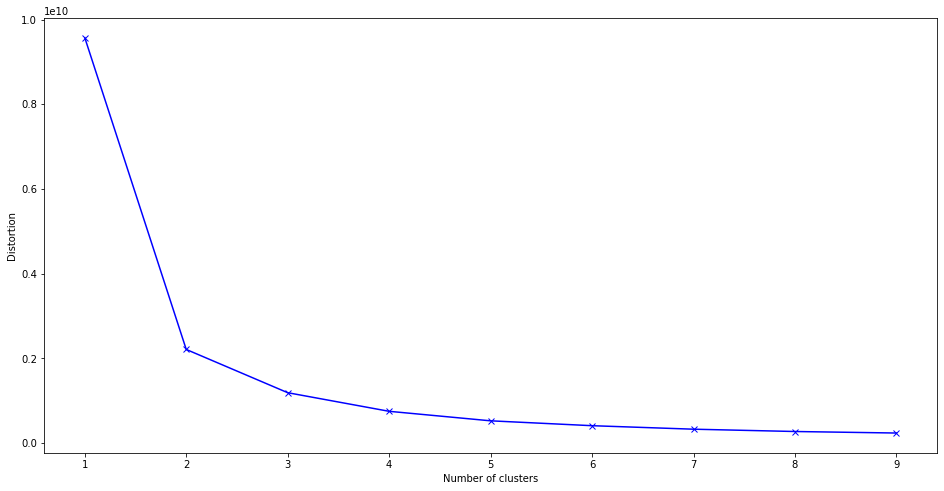

In [177]:
plt.figure(figsize=(16, 8))
plt.plot(clusters, distortions, '-bx')
plt.xlabel('Number of clusters')
plt.ylabel("Distortion")
plt.show()

Looks like the optimal number of clusters is 3? or is it 2.... Which doesn't seem right to me so let's just ignore this and input own number of clusters.

In [178]:
kmeans = KMeans(n_clusters = 5).fit(onehot_df)

In [179]:
kmeans.labels_

array([3, 3, 0, ..., 3, 3, 4], dtype=int32)

In [185]:
labels = pd.DataFrame({'LABELS': kmeans.labels_})

In [199]:
labels

LABELS
0          3
1          3
2          0
3          0
4          3
...      ...
1767       3
1768       3
1769       3
1770       3
1771       4

[1772 rows x 1 columns]

In [200]:
df

TITLE              REGION  \
0           Sawtooth Ridge  Eastern Washington   
1        Rattlesnake Trail  Eastern Washington   
2             Oregon Butte  Eastern Washington   
3             Mount Misery  Eastern Washington   
4             Dexter Ridge  Eastern Washington   
...                    ...                 ...   
3883           Craggy Peak      South Cascades   
3884  Cramer Lake Snowshoe      South Cascades   
3886  Corral Pass Snowshoe  Mount Rainier Area   
3889           County Line   Snoqualmie Region   
3894          Cooper River   Snoqualmie Region   

                      SPECIFIC REGION  DISTANCE  DIST_TYPE    GAIN  HIGHEST  \
0          Palouse and Blue Mountains       8.0  roundtrip   500.0   5500.0   
1          Palouse and Blue Mountains      10.0  roundtrip  2900.0   5700.0   
2          Palouse and Blue Mountains       6.0  roundtrip   987.0   6387.0   
3          Palouse and Blue Mountains      16.0  roundtrip  1000.0   6401.0   
4          Palouse and Blue Mountains       5.0    one-way  2547.0   5500.0   
...                               ...       ...        ...     ...      ...   
3883                      Dark Divide      11.0  roundtrip  1800.0   5275.0   
3884  White Pass/Cowlitz River Valley       7.0  roundtrip   840.0   5080.0   
3886           Chinook Pass - Hwy 410      11.5  roundtrip  2800.0   5700.0   
3889           Salmon La Sac/Teanaway      10.0  roundtrip  1875.0   5700.0   
3894           Salmon La Sac/Teanaway       7.8  roundtrip   400.0   2800.0   

      RATING  RATING_COUNT   LATITUDE  ...  SUMMITS WILDLIFE  RIDGES  \
0       2.67             3  46.061784  ...        0        0       1   
1       3.43             7  46.204339  ...        1        0       1   
2       4.14             7  46.118332  ...        1        1       1   
3       2.75             4  46.118201  ...        1        1       1   
4       0.00             0  46.021522  ...        0        0       0   
...      ...           ...        ...  ...      ...      ...     ...   
3883    3.17             6  46.213350  ...        0        0       1   
3884    4.00             2  46.654856  ...        0        0       0   
3886    0.00             0  46.999456  ...        1        0       0   
3889    3.20             5  47.359271  ...        0        0       1   
3894    3.36            11  47.409338  ...        0        1       0   

      ESTABLISHED CAMPSITES  DOGS ALLOWED ON LEASH  NO DOGS  KID FRIENDLY  \
0                         0                      0        0             1   
1                         1                      1        0             0   
2                         1                      1        0             0   
3                         1                      1        0             1   
4                         0                      0        0             0   
...                     ...                    ...      ...           ...   
3883                      0                      0        0             0   
3884                      0                      1        0             0   
3886                      0                      0        0             0   
3889                      0                      1        0             0   
3894                      1                      1        0             1   

            REQUIRED PASSES  \
0                   No pass   
1                   No pass   
2     Northwest Forest Pass   
3     Northwest Forest Pass   
4     Northwest Forest Pass   
...                     ...   
3883  Northwest Forest Pass   
3884                No pass   
3886                No pass   
3889  Northwest Forest Pass   
3894  Northwest Forest Pass   

                                                    URL            DIFFICULTY  
0     https://www.wta.org/go-hiking/hikes/sawtooth-r...              moderate  
1     https://www.wta.org/go-hiking/hikes/rattlesnak...        very strenuous  
2      https://www.wta.org/go-hiking/hikes/oregon-butte  moderately 

In [10]:
df = df.reset_index()

In [11]:
df

index                 TITLE              REGION  \
0         0        Sawtooth Ridge  Eastern Washington   
1         1     Rattlesnake Trail  Eastern Washington   
2         2          Oregon Butte  Eastern Washington   
3         3          Mount Misery  Eastern Washington   
4         4          Dexter Ridge  Eastern Washington   
...     ...                   ...                 ...   
1767   3883           Craggy Peak      South Cascades   
1768   3884  Cramer Lake Snowshoe      South Cascades   
1769   3886  Corral Pass Snowshoe  Mount Rainier Area   
1770   3889           County Line   Snoqualmie Region   
1771   3894          Cooper River   Snoqualmie Region   

                      SPECIFIC REGION  DISTANCE  DIST_TYPE    GAIN  HIGHEST  \
0          Palouse and Blue Mountains       8.0  roundtrip   500.0   5500.0   
1          Palouse and Blue Mountains      10.0  roundtrip  2900.0   5700.0   
2          Palouse and Blue Mountains       6.0  roundtrip   987.0   6387.0   
3          Palouse and Blue Mountains      16.0  roundtrip  1000.0   6401.0   
4          Palouse and Blue Mountains       5.0    one-way  2547.0   5500.0   
...                               ...       ...        ...     ...      ...   
1767                      Dark Divide      11.0  roundtrip  1800.0   5275.0   
1768  White Pass/Cowlitz River Valley       7.0  roundtrip   840.0   5080.0   
1769           Chinook Pass - Hwy 410      11.5  roundtrip  2800.0   5700.0   
1770           Salmon La Sac/Teanaway      10.0  roundtrip  1875.0   5700.0   
1771           Salmon La Sac/Teanaway       7.8  roundtrip   400.0   2800.0   

      RATING  RATING_COUNT  ...  SUMMITS  WILDLIFE RIDGES  \
0       2.67             3  ...        0         0      1   
1       3.43             7  ...        1         0      1   
2       4.14             7  ...        1         1      1   
3       2.75             4  ...        1         1      1   
4       0.00             0  ...        0         0      0   
...      ...           ...  ...      ...       ...    ...   
1767    3.17             6  ...        0         0      1   
1768    4.00             2  ...        0         0      0   
1769    0.00             0  ...        1         0      0   
1770    3.20             5  ...        0         0      1   
1771    3.36            11  ...        0         1      0   

      ESTABLISHED CAMPSITES  DOGS ALLOWED ON LEASH  NO DOGS  KID FRIENDLY  \
0                         0                      0        0             1   
1                         1                      1        0             0   
2                         1                      1        0             0   
3                         1                      1        0             1   
4                         0                      0        0             0   
...                     ...                    ...      ...           ...   
1767                      0                      0        0             0   
1768                      0                      1        0             0   
1769                      0                      0        0             0   
1770                      0                      1        0             0   
1771                      1                      1        0             1   

            REQUIRED PASSES  \
0                   No pass   
1                   No pass   
2     Northwest Forest Pass   
3     Northwest Forest Pass   
4     Northwest Forest Pass   
...                     ...   
1767  Northwest Forest Pass   
1768                No pass   
1769                No pass   
1770  Northwest Forest Pass   
1771  Northwest Forest Pass   

                                                    URL            DIFFICULTY  
0     https://www.wta.org/go-hiking/hikes/sawtooth-r...              moderate  
1     https://www.wta.org/go-hiking/hikes/rattlesnak...        very strenuous  
2      https://www.wta.org/go-hiking/hikes/oregon-butte  moderately strenuous  
3      https://www.wt

In [220]:
labeled_df = pd.concat([df, labels], axis=1)

In [221]:
labeled_df

index                 TITLE              REGION  \
0         0        Sawtooth Ridge  Eastern Washington   
1         1     Rattlesnake Trail  Eastern Washington   
2         2          Oregon Butte  Eastern Washington   
3         3          Mount Misery  Eastern Washington   
4         4          Dexter Ridge  Eastern Washington   
...     ...                   ...                 ...   
1767   3883           Craggy Peak      South Cascades   
1768   3884  Cramer Lake Snowshoe      South Cascades   
1769   3886  Corral Pass Snowshoe  Mount Rainier Area   
1770   3889           County Line   Snoqualmie Region   
1771   3894          Cooper River   Snoqualmie Region   

                      SPECIFIC REGION  DISTANCE  DIST_TYPE    GAIN  HIGHEST  \
0          Palouse and Blue Mountains       8.0  roundtrip   500.0   5500.0   
1          Palouse and Blue Mountains      10.0  roundtrip  2900.0   5700.0   
2          Palouse and Blue Mountains       6.0  roundtrip   987.0   6387.0   
3          Palouse and Blue Mountains      16.0  roundtrip  1000.0   6401.0   
4          Palouse and Blue Mountains       5.0    one-way  2547.0   5500.0   
...                               ...       ...        ...     ...      ...   
1767                      Dark Divide      11.0  roundtrip  1800.0   5275.0   
1768  White Pass/Cowlitz River Valley       7.0  roundtrip   840.0   5080.0   
1769           Chinook Pass - Hwy 410      11.5  roundtrip  2800.0   5700.0   
1770           Salmon La Sac/Teanaway      10.0  roundtrip  1875.0   5700.0   
1771           Salmon La Sac/Teanaway       7.8  roundtrip   400.0   2800.0   

      RATING  RATING_COUNT  ...  WILDLIFE  RIDGES ESTABLISHED CAMPSITES  \
0       2.67             3  ...         0       1                     0   
1       3.43             7  ...         0       1                     1   
2       4.14             7  ...         1       1                     1   
3       2.75             4  ...         1       1                     1   
4       0.00             0  ...         0       0                     0   
...      ...           ...  ...       ...     ...                   ...   
1767    3.17             6  ...         0       1                     0   
1768    4.00             2  ...         0       0                     0   
1769    0.00             0  ...         0       0                     0   
1770    3.20             5  ...         0       1                     0   
1771    3.36            11  ...         1       0                     1   

      DOGS ALLOWED ON LEASH  NO DOGS  KID FRIENDLY        REQUIRED PASSES  \
0                         0        0             1                No pass   
1                         1        0             0                No pass   
2                         1        0             0  Northwest Forest Pass   
3                         1        0             1  Northwest Forest Pass   
4                         0        0             0  Northwest Forest Pass   
...                     ...      ...           ...                    ...   
1767                      0        0             0  Northwest Forest Pass   
1768                      1        0             0                No pass   
1769                      0        0             0                No pass   
1770                      1        0             0  Northwest Forest Pass   
1771                      1        0             1  Northwest Forest Pass   

                                                    URL            DIFFICULTY  \
0     https://www.wta.org/go-hiking/hikes/sawtooth-r...              moderate   
1     https://www.wta.org/go-hiking/hikes/rattlesnak...        very strenuous   
2      https://www.wta.org/go-hiking/hikes/oregon-butte  moderately strenuous   
3      https://www.wta.org/go-hiking/hikes/mount-misery             strenuous   
4      https://www.wta.org/go-hiking/hikes/dexter-ridge        very strenuous   
...                                                 ...     

In [224]:
group_0 = labeled_df[labeled_df['LABELS'] == 0]

In [226]:
group_0["DIFFICULTY"].value_counts()

very strenuous          169
strenuous                28
moderately strenuous     20
moderate                 12
easy                      4
Name: DIFFICULTY, dtype: int64

In [227]:
group_1 = labeled_df[labeled_df['LABELS'] == 1]

In [228]:
group_1["DIFFICULTY"].value_counts()

easy                    276
moderate                101
moderately strenuous     23
very strenuous            7
strenuous                 5
Name: DIFFICULTY, dtype: int64

In [234]:
for label in range(5):
    print(label)
    print(labeled_df[labeled_df['LABELS'] == label]["DIFFICULTY"].value_counts())
    print("\n")
    print(labeled_df[labeled_df['LABELS'] == label]["REGION"].value_counts())
    print("\n")

0
very strenuous          169
strenuous                28
moderately strenuous     20
moderate                 12
easy                      4
Name: DIFFICULTY, dtype: int64


North Cascades        80
Mount Rainier Area    47
Central Cascades      45
Eastern Washington    23
Snoqualmie Region     15
Olympic Peninsula     12
South Cascades        10
Central Washington     1
Name: REGION, dtype: int64


1
easy                    276
moderate                101
moderately strenuous     23
very strenuous            7
strenuous                 5
Name: DIFFICULTY, dtype: int64


Puget Sound and Islands    165
Olympic Peninsula           81
Southwest Washington        65
Issaquah Alps               37
Central Washington          19
North Cascades              18
Snoqualmie Region           10
Central Cascades             8
Mount Rainier Area           4
Eastern Washington           3
South Cascades               2
Name: REGION, dtype: int64


2
very strenuous          97
moderate              

In [237]:
X_embedded = TSNE(n_components=2).fit_transform(onehot_df)

In [240]:
X_embedded.shape

(1772, 2)

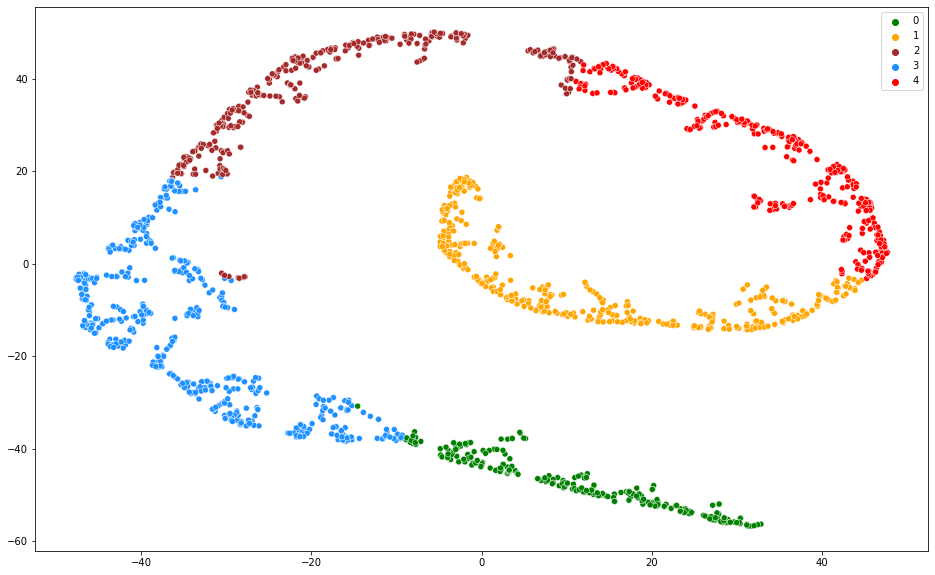

In [249]:
plt.figure(figsize=(16, 10))

sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=kmeans.labels_,
               palette=['green','orange','brown','dodgerblue','red'])
plt.show()

In [253]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components = 2).fit_transform(onehot_df)

In [254]:
lle.shape

(1772, 2)

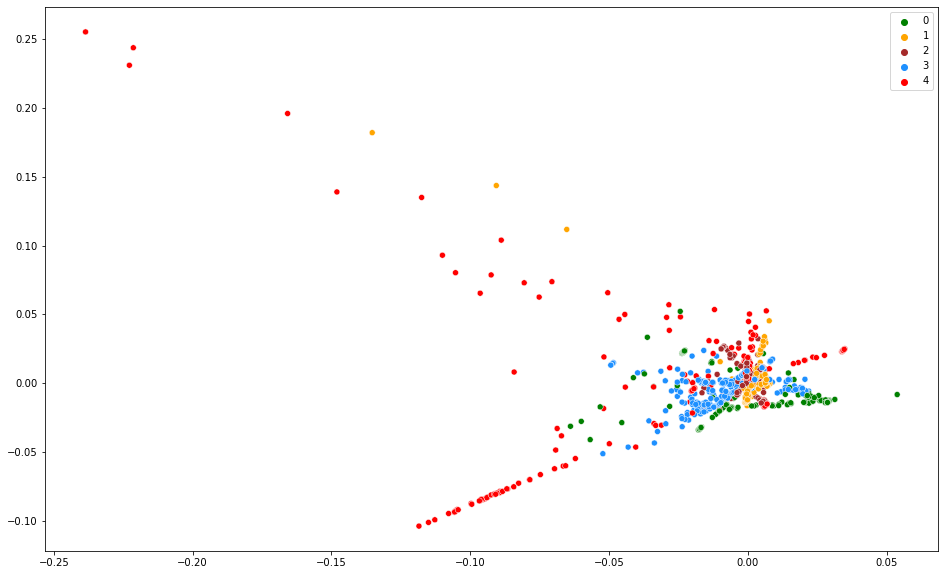

In [255]:
plt.figure(figsize=(16, 10))

sns.scatterplot(x=lle[:,0], y=lle[:,1], hue=kmeans.labels_,
               palette=['green','orange','brown','dodgerblue','red'])
plt.show()

kmeans with 3 or 4 clusters according to the elbow plot

In [267]:
kmeans_elbow = KMeans(n_clusters = 4).fit(onehot_df)

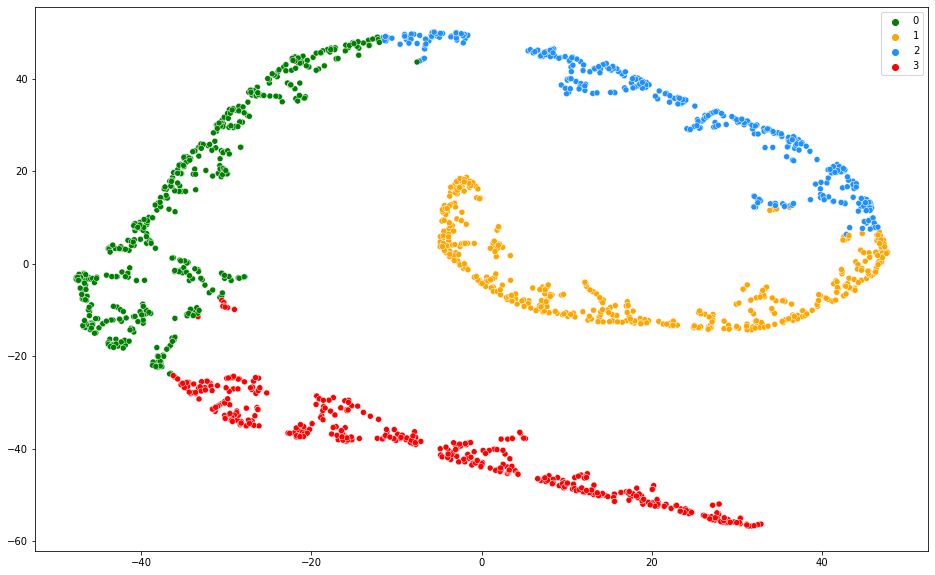

In [268]:
plt.figure(figsize=(16, 10))

sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=kmeans_elbow.labels_,
               palette=['green','orange','dodgerblue', 'red'])
plt.show()

In [269]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit_transform(onehot_df)

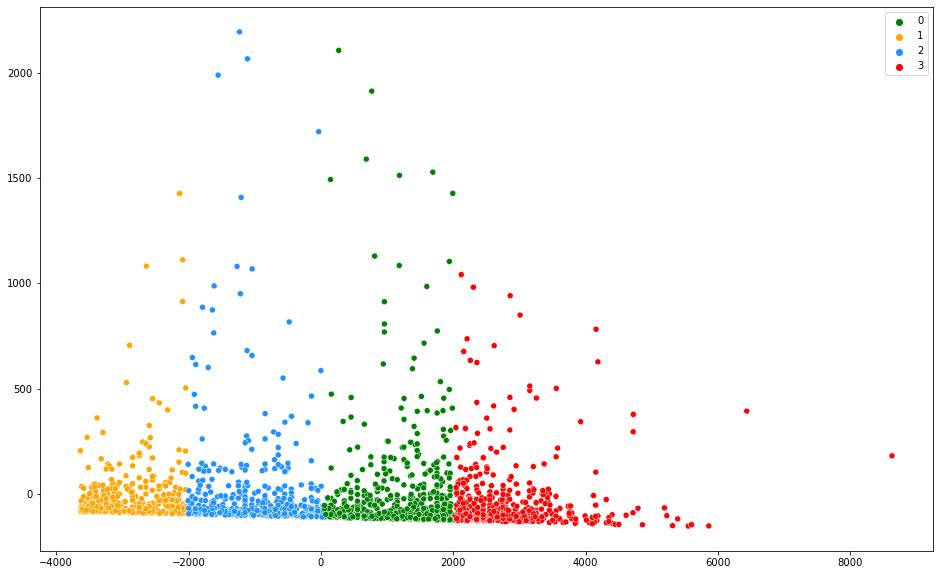

In [270]:
plt.figure(figsize=(16, 10))

sns.scatterplot(x=pca[:,0], y=pca[:,1], hue=kmeans_elbow.labels_,
               palette=['green','orange','dodgerblue', 'red'])
plt.show()

In [271]:
df

index                 TITLE              REGION  \
0         0        Sawtooth Ridge  Eastern Washington   
1         1     Rattlesnake Trail  Eastern Washington   
2         2          Oregon Butte  Eastern Washington   
3         3          Mount Misery  Eastern Washington   
4         4          Dexter Ridge  Eastern Washington   
...     ...                   ...                 ...   
1767   3883           Craggy Peak      South Cascades   
1768   3884  Cramer Lake Snowshoe      South Cascades   
1769   3886  Corral Pass Snowshoe  Mount Rainier Area   
1770   3889           County Line   Snoqualmie Region   
1771   3894          Cooper River   Snoqualmie Region   

                      SPECIFIC REGION  DISTANCE  DIST_TYPE    GAIN  HIGHEST  \
0          Palouse and Blue Mountains       8.0  roundtrip   500.0   5500.0   
1          Palouse and Blue Mountains      10.0  roundtrip  2900.0   5700.0   
2          Palouse and Blue Mountains       6.0  roundtrip   987.0   6387.0   
3          Palouse and Blue Mountains      16.0  roundtrip  1000.0   6401.0   
4          Palouse and Blue Mountains       5.0    one-way  2547.0   5500.0   
...                               ...       ...        ...     ...      ...   
1767                      Dark Divide      11.0  roundtrip  1800.0   5275.0   
1768  White Pass/Cowlitz River Valley       7.0  roundtrip   840.0   5080.0   
1769           Chinook Pass - Hwy 410      11.5  roundtrip  2800.0   5700.0   
1770           Salmon La Sac/Teanaway      10.0  roundtrip  1875.0   5700.0   
1771           Salmon La Sac/Teanaway       7.8  roundtrip   400.0   2800.0   

      RATING  RATING_COUNT  ...  SUMMITS  WILDLIFE RIDGES  \
0       2.67             3  ...        0         0      1   
1       3.43             7  ...        1         0      1   
2       4.14             7  ...        1         1      1   
3       2.75             4  ...        1         1      1   
4       0.00             0  ...        0         0      0   
...      ...           ...  ...      ...       ...    ...   
1767    3.17             6  ...        0         0      1   
1768    4.00             2  ...        0         0      0   
1769    0.00             0  ...        1         0      0   
1770    3.20             5  ...        0         0      1   
1771    3.36            11  ...        0         1      0   

      ESTABLISHED CAMPSITES  DOGS ALLOWED ON LEASH  NO DOGS  KID FRIENDLY  \
0                         0                      0        0             1   
1                         1                      1        0             0   
2                         1                      1        0             0   
3                         1                      1        0             1   
4                         0                      0        0             0   
...                     ...                    ...      ...           ...   
1767                      0                      0        0             0   
1768                      0                      1        0             0   
1769                      0                      0        0             0   
1770                      0                      1        0             0   
1771                      1                      1        0             1   

            REQUIRED PASSES  \
0                   No pass   
1                   No pass   
2     Northwest Forest Pass   
3     Northwest Forest Pass   
4     Northwest Forest Pass   
...                     ...   
1767  Northwest Forest Pass   
1768                No pass   
1769                No pass   
1770  Northwest Forest Pass   
1771  Northwest Forest Pass   

                                                    URL            DIFFICULTY  
0     https://www.wta.org/go-hiking/hikes/sawtooth-r...              moderate  
1     https://www.wta.org/go-hiking/hikes/rattlesnak...        very strenuous  
2      https://www.wta.org/go-hiking/hikes/oregon-butte  moderately strenuous  
3      https://www.wt

In [28]:
onehot_df_2 = pd.get_dummies(df)

In [33]:
onehot_df_2hot_df_2

HIGHEST   LATITUDE   LONGITUDE  COAST  RIVERS  LAKES  WATERFALLS  \
0      5500.0  46.061784 -117.844133      0       0      0           0   
1      5700.0  46.204339 -117.705824      0       0      0           0   
2      6387.0  46.118332 -117.714965      0       0      0           0   
3      6401.0  46.118201 -117.714360      0       0      0           0   
4      5500.0  46.021522 -117.790014      0       1      0           0   
...       ...        ...         ...    ...     ...    ...         ...   
3886   5700.0  46.999456 -121.528358      0       0      0           0   
3887   4750.0  46.121600 -121.561217      0       0      0           0   
3889   5700.0  47.359271 -120.691928      0       0      0           0   
3894   2800.0  47.409338 -121.106670      0       1      1           0   
3896   2400.0  47.399304 -120.395672      0       1      0           0   

      OLD GROWTH  FALL FOLIAGE  WILDFLOWERS/MEADOWS  ...  \
0              0             0                    1  ...   
1              0             0                    1  ...   
2              0             0                    1  ...   
3              0             0                    1  ...   
4              0             0                    0  ...   
...          ...           ...                  ...  ...   
3886           0             0                    1  ...   
3887           0             0                    1  ...   
3889           0             0                    1  ...   
3894           1             1                    1  ...   
3896           0             0                    0  ...   

      SPECIFIC REGION_Vancouver Area  SPECIFIC REGION_Wenatchee  \
0                                  0                          0   
1                                  0                          0   
2                                  0                          0   
3                                  0                          0   
4                                  0                          0   
...                              ...                        ...   
3886                               0                          0   
3887                               0                          0   
3889                               0                          0   
3894                               0                          0   
3896                               0                          1   

      SPECIFIC REGION_Whidbey Island  \
0                                  0   
1                                  0   
2                                  0   
3                                  0   
4                                  0   
...                              ...   
3886                               0   
3887                               0   
3889                               0   
3894                               0   
3896                               0   

      SPECIFIC REGION_White Pass/Cowlitz River Valley  SPECIFIC REGION_Yakima  \
0                                                   0                       0   
1                                                   0                       0   
2                                                   0                       0   
3                                                   0                       0   
4                                                   0                       0   
...                                               ...                     ...   
3886                                                0                       0   
3887                                                0                       0   
3889                                                0                       0   
3894                                                0                       0   
3896                                                0                       0   

      DIFFICULTY_easy  DIFFICULTY_moderate  DIFFICULTY_moderately strenuous  \
0                   0                    1                

Trying Mean shift

In [35]:
from sklearn.cluster import MeanShift

In [36]:
meanshift = MeanShift().fit(onehot_df_2)

In [37]:
meanshift.n_iter_

35

In [40]:
print("The number of clusters is:", len(meanshift.cluster_centers_))

The number of clusters is: 4


In [46]:
X_embedded = TSNE(n_components=2).fit_transform(onehot_df_2)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


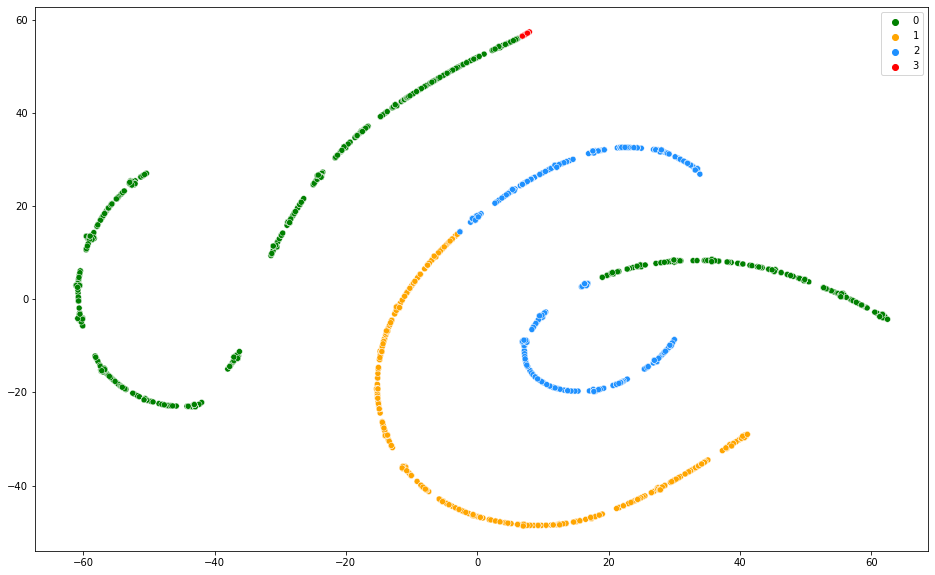

In [47]:
plt.figure(figsize=(16, 10))

sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=meanshift.labels_,
               palette=['green','orange','dodgerblue', 'red'])
plt.show()

In [48]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit_transform(onehot_df_2)

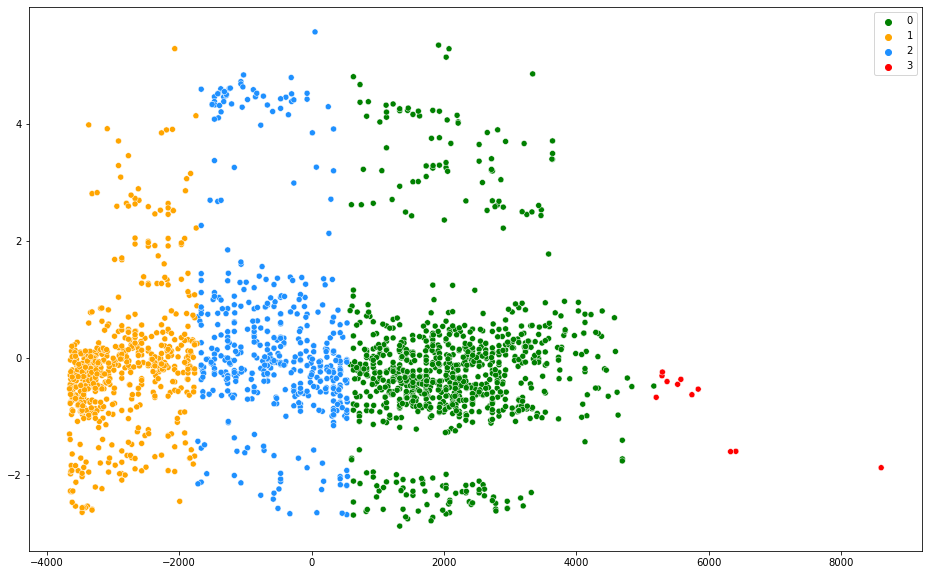

In [49]:
plt.figure(figsize=(16, 10))

sns.scatterplot(x=pca[:,0], y=pca[:,1], hue=meanshift.labels_,
               palette=['green','orange','dodgerblue', 'red'])
plt.show()

In [76]:
from sklearn.cluster import OPTICS

In [77]:
from sklearn.preprocessing import StandardScaler

In [89]:
X = StandardScaler().fit_transform(onehot_df_2)

In [90]:
dbscan = OPTICS(min_cluster_size=2).fit(X)

In [91]:
dbscan.labels_

array([-1, -1, -1, ..., 30, -1, 85])

In [93]:
dbscan.cluster_hierarchy_

array([[   2,    8],
       [   1,   19],
       [   0,   34],
       [  35,   45],
       [  48,   55],
       [  35,   85],
       [  87,  101],
       [  87,  118],
       [  86,  130],
       [ 146,  148],
       [ 142,  150],
       [ 157,  161],
       [  86,  168],
       [ 177,  181],
       [ 186,  191],
       [ 209,  216],
       [ 220,  223],
       [ 169,  255],
       [  86,  255],
       [ 274,  281],
       [ 282,  293],
       [ 302,  307],
       [ 256,  318],
       [ 319,  328],
       [ 256,  336],
       [ 340,  349],
       [ 338,  355],
       [ 256,  357],
       [ 358,  383],
       [ 384,  398],
       [ 358,  403],
       [ 424,  428],
       [ 437,  442],
       [ 423,  450],
       [ 468,  469],
       [ 404,  482],
       [ 483,  488],
       [ 493,  496],
       [ 483,  543],
       [ 404,  543],
       [ 549,  553],
       [ 555,  560],
       [ 577,  578],
       [ 544,  588],
       [ 590,  595],
       [ 590,  608],
       [ 622,  632],
       [ 644,

# Organization starts here:

1) Feature engineering
2) Try throwing out some features that aren't really descriptive of the hike/trails
3) Drop all rows with NaN values and reset index
4) One-hot encdoing and standardization
5) Dimensionaly reduction (t-SNE or PCA?)
- leaning towards t-SNE more since PCA assumes linearity of data

## 1) Feature engineering

In [113]:
# Load the data
df = pd.read_csv("2021-11-08_wta_hike_data.csv")

In [114]:
df.head()

TITLE              REGION             SPECIFIC REGION  \
0     Sawtooth Ridge  Eastern Washington  Palouse and Blue Mountains   
1  Rattlesnake Trail  Eastern Washington  Palouse and Blue Mountains   
2       Oregon Butte  Eastern Washington  Palouse and Blue Mountains   
3       Mount Misery  Eastern Washington  Palouse and Blue Mountains   
4       Dexter Ridge  Eastern Washington  Palouse and Blue Mountains   

   DISTANCE  DIST_TYPE    GAIN  HIGHEST  RATING  RATING_COUNT   LATITUDE  ...  \
0       8.0  roundtrip   500.0   5500.0    2.67             3  46.061784  ...   
1      10.0  roundtrip  2900.0   5700.0    3.43             7  46.204339  ...   
2       6.0  roundtrip   987.0   6387.0    4.14             7  46.118332  ...   
3      16.0  roundtrip  1000.0   6401.0    2.75             4  46.118201  ...   
4       5.0    one-way  2547.0   5500.0    0.00             0  46.021522  ...   

   MOUNTAIN VIEWS SUMMITS  WILDLIFE  RIDGES  ESTABLISHED CAMPSITES  \
0               1       0         0       1                      0   
1               1       1         0       1                      1   
2               1       1         1       1                      1   
3               1       1         1       1                      1   
4               0       0         0       0                      0   

   DOGS ALLOWED ON LEASH  NO DOGS  KID FRIENDLY        REQUIRED PASSES  \
0                      0        0             1                No pass   
1                      1        0             0                No pass   
2                      1        0             0  Northwest Forest Pass   
3                      1        0             1  Northwest Forest Pass   
4                      0        0             0  Northwest Forest Pass   

                                                 URL  
0  https://www.wta.org/go-hiking/hikes/sawtooth-r...  
1  https://www.wta.org/go-hiking/hikes/rattlesnak...  
2   https://www.wta.org/go-hiking/hikes/oregon-butte  
3   https://www.wta.org/go-hiking/hikes/mount-misery  
4   https://www.wta.org/go-hiking/hikes/dexter-ridge  

[5 rows x 30 columns]

### Convert distance, distance type, and gain features to one feature, difficulty.

In [115]:
df["DIFFICULTY"] = ""
for i in df.index:
    dist = df.at[i, 'DISTANCE']
    gain = df.at[i, 'GAIN']
    if df.at[i, 'DIST_TYPE'] == 'one-way':
        dist = dist * 2
    val = math.sqrt(gain * 2 * dist)
    if val < 50:
        difficulty = 'easy'
    elif val >= 50 and val < 100:
        difficulty = 'moderate'
    elif val >= 100 and val < 150:
        difficulty = 'moderately strenuous'
    elif val >= 150 and val < 200:
        difficulty = 'strenuous'
    elif val > 200:
        difficulty = 'very strenuous'
    else:
        difficulty = float("NaN")
    df.at[i, 'DIFFICULTY'] = difficulty

In [116]:
df.head()

TITLE              REGION             SPECIFIC REGION  \
0     Sawtooth Ridge  Eastern Washington  Palouse and Blue Mountains   
1  Rattlesnake Trail  Eastern Washington  Palouse and Blue Mountains   
2       Oregon Butte  Eastern Washington  Palouse and Blue Mountains   
3       Mount Misery  Eastern Washington  Palouse and Blue Mountains   
4       Dexter Ridge  Eastern Washington  Palouse and Blue Mountains   

   DISTANCE  DIST_TYPE    GAIN  HIGHEST  RATING  RATING_COUNT   LATITUDE  ...  \
0       8.0  roundtrip   500.0   5500.0    2.67             3  46.061784  ...   
1      10.0  roundtrip  2900.0   5700.0    3.43             7  46.204339  ...   
2       6.0  roundtrip   987.0   6387.0    4.14             7  46.118332  ...   
3      16.0  roundtrip  1000.0   6401.0    2.75             4  46.118201  ...   
4       5.0    one-way  2547.0   5500.0    0.00             0  46.021522  ...   

   SUMMITS WILDLIFE  RIDGES  ESTABLISHED CAMPSITES  DOGS ALLOWED ON LEASH  \
0        0        0       1                      0                      0   
1        1        0       1                      1                      1   
2        1        1       1                      1                      1   
3        1        1       1                      1                      1   
4        0        0       0                      0                      0   

   NO DOGS  KID FRIENDLY        REQUIRED PASSES  \
0        0             1                No pass   
1        0             0                No pass   
2        0             0  Northwest Forest Pass   
3        0             1  Northwest Forest Pass   
4        0             0  Northwest Forest Pass   

                                                 URL            DIFFICULTY  
0  https://www.wta.org/go-hiking/hikes/sawtooth-r...              moderate  
1  https://www.wta.org/go-hiking/hikes/rattlesnak...        very strenuous  
2   https://www.wta.org/go-hiking/hikes/oregon-butte  moderately strenuous  
3   https://www.wta.org/go-hiking/hikes/mount-misery             strenuous  
4   https://www.wta.org/go-hiking/hikes/dexter-ridge        very strenuous  

[5 rows x 31 columns]

## 2) Try throwing out some features that aren't really physical descriptiors of the hike/trails

In [117]:
df.columns

Index(['TITLE', 'REGION', 'SPECIFIC REGION', 'DISTANCE', 'DIST_TYPE', 'GAIN',
       'HIGHEST', 'RATING', 'RATING_COUNT', 'LATITUDE', 'LONGITUDE',
       'MOST_RECENT_REPORT_DATE', 'REPORT_COUNT', 'COAST', 'RIVERS', 'LAKES',
       'WATERFALLS', 'OLD GROWTH', 'FALL FOLIAGE', 'WILDFLOWERS/MEADOWS',
       'MOUNTAIN VIEWS', 'SUMMITS', 'WILDLIFE', 'RIDGES',
       'ESTABLISHED CAMPSITES', 'DOGS ALLOWED ON LEASH', 'NO DOGS',
       'KID FRIENDLY', 'REQUIRED PASSES', 'URL', 'DIFFICULTY'],
      dtype='object')

Throwing out:
- DISTANCE, DIST_TYPE, GAIN: since that has all been bunched into a single feature
- RATING: descriptive, but not physically
- RATING_COUNT: speaks to popularity and I don't want that to influence clustering
- MOST_RECENT_REPORT_DATE: same reason as above
- REPORT_COUNT: same reason as above
- DOGS ALLOWED ON LEASH, NO DOGS, KID FRIENDLY, REQUIRED PASSES, URL: not physically descriptive of hike/trail

In [118]:
df_dropped = df.drop(['DISTANCE', 'DIST_TYPE', 'GAIN', 'RATING', 'RATING_COUNT', 'MOST_RECENT_REPORT_DATE',
             'REPORT_COUNT', 'DOGS ALLOWED ON LEASH', 'NO DOGS', 'KID FRIENDLY', 'REQUIRED PASSES', 'URL'], axis=1)

In [119]:
df_dropped.head()

TITLE              REGION             SPECIFIC REGION  HIGHEST  \
0     Sawtooth Ridge  Eastern Washington  Palouse and Blue Mountains   5500.0   
1  Rattlesnake Trail  Eastern Washington  Palouse and Blue Mountains   5700.0   
2       Oregon Butte  Eastern Washington  Palouse and Blue Mountains   6387.0   
3       Mount Misery  Eastern Washington  Palouse and Blue Mountains   6401.0   
4       Dexter Ridge  Eastern Washington  Palouse and Blue Mountains   5500.0   

    LATITUDE   LONGITUDE  COAST  RIVERS  LAKES  WATERFALLS  OLD GROWTH  \
0  46.061784 -117.844133      0       0      0           0           0   
1  46.204339 -117.705824      0       0      0           0           0   
2  46.118332 -117.714965      0       0      0           0           0   
3  46.118201 -117.714360      0       0      0           0           0   
4  46.021522 -117.790014      0       1      0           0           0   

   FALL FOLIAGE  WILDFLOWERS/MEADOWS  MOUNTAIN VIEWS  SUMMITS  WILDLIFE  \
0             0                    1               1        0         0   
1             0                    1               1        1         0   
2             0                    1               1        1         1   
3             0                    1               1        1         1   
4             0                    0               0        0         0   

   RIDGES  ESTABLISHED CAMPSITES            DIFFICULTY  
0       1                      0              moderate  
1       1                      1        very strenuous  
2       1                      1  moderately strenuous  
3       1                      1             strenuous  
4       0                      0        very strenuous

## 3) Drop all rows with NaN values and reset index

In [120]:
df_dropped = df_dropped.dropna().reset_index().drop(['index'], axis=1)

In [121]:
df_dropped.head()

TITLE              REGION             SPECIFIC REGION  HIGHEST  \
0     Sawtooth Ridge  Eastern Washington  Palouse and Blue Mountains   5500.0   
1  Rattlesnake Trail  Eastern Washington  Palouse and Blue Mountains   5700.0   
2       Oregon Butte  Eastern Washington  Palouse and Blue Mountains   6387.0   
3       Mount Misery  Eastern Washington  Palouse and Blue Mountains   6401.0   
4       Dexter Ridge  Eastern Washington  Palouse and Blue Mountains   5500.0   

    LATITUDE   LONGITUDE  COAST  RIVERS  LAKES  WATERFALLS  OLD GROWTH  \
0  46.061784 -117.844133      0       0      0           0           0   
1  46.204339 -117.705824      0       0      0           0           0   
2  46.118332 -117.714965      0       0      0           0           0   
3  46.118201 -117.714360      0       0      0           0           0   
4  46.021522 -117.790014      0       1      0           0           0   

   FALL FOLIAGE  WILDFLOWERS/MEADOWS  MOUNTAIN VIEWS  SUMMITS  WILDLIFE  \
0             0                    1               1        0         0   
1             0                    1               1        1         0   
2             0                    1               1        1         1   
3             0                    1               1        1         1   
4             0                    0               0        0         0   

   RIDGES  ESTABLISHED CAMPSITES            DIFFICULTY  
0       1                      0              moderate  
1       1                      1        very strenuous  
2       1                      1  moderately strenuous  
3       1                      1             strenuous  
4       0                      0        very strenuous

In [122]:
df_dropped.columns

Index(['TITLE', 'REGION', 'SPECIFIC REGION', 'HIGHEST', 'LATITUDE',
       'LONGITUDE', 'COAST', 'RIVERS', 'LAKES', 'WATERFALLS', 'OLD GROWTH',
       'FALL FOLIAGE', 'WILDFLOWERS/MEADOWS', 'MOUNTAIN VIEWS', 'SUMMITS',
       'WILDLIFE', 'RIDGES', 'ESTABLISHED CAMPSITES', 'DIFFICULTY'],
      dtype='object')

## 4) One-hot encoding and Standardization

In [183]:
one_hot_df = pd.get_dummies(df_dropped.drop(['TITLE', 'REGION', 'SPECIFIC REGION', 'DIFFICULTY'], axis=1))

In [184]:
X = StandardScaler().fit_transform(one_hot_df)

In [185]:
X.shape

(1981, 15)

## 5) Dimensionality Reduction

In [186]:
tsne = TSNE(random_state=0, n_components=2).fit_transform(X)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [187]:
tsne.shape

(1981, 2)

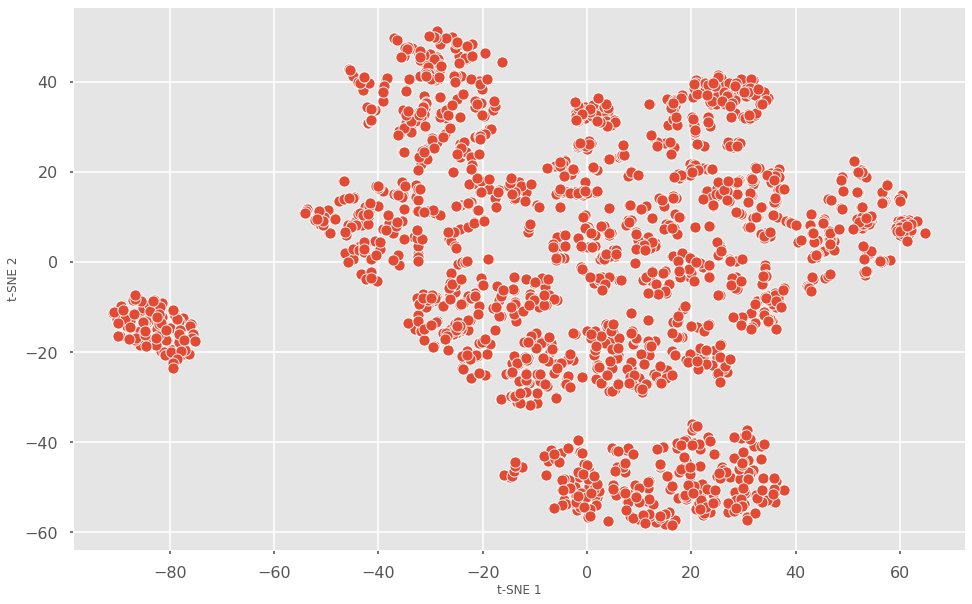

In [188]:
plt.figure(figsize=(16, 10))
sns.scatterplot(x=tsne[:,0], y=tsne[:,1])
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

## 6) Model training and evaluation

### Kmeans

In [149]:
# Trying elbow method 
distortions = []
clusters = range(1, 10, 1)
for cluster in clusters:
    kmeans = KMeans(n_clusters = cluster).fit(tsne)
    distortions.append(kmeans.inertia_)

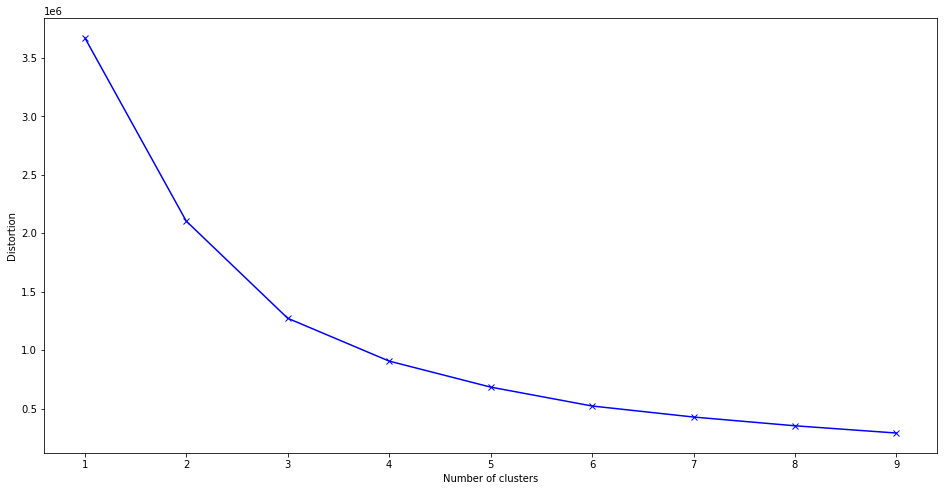

In [150]:
plt.figure(figsize=(16, 8))
plt.plot(clusters, distortions, '-bx')
plt.xlabel('Number of clusters')
plt.ylabel("Distortion")
plt.show()

Elbow looks like it's at 3. 

In [182]:
kmeans = KMeans(n_clusters=14).fit(tsne)

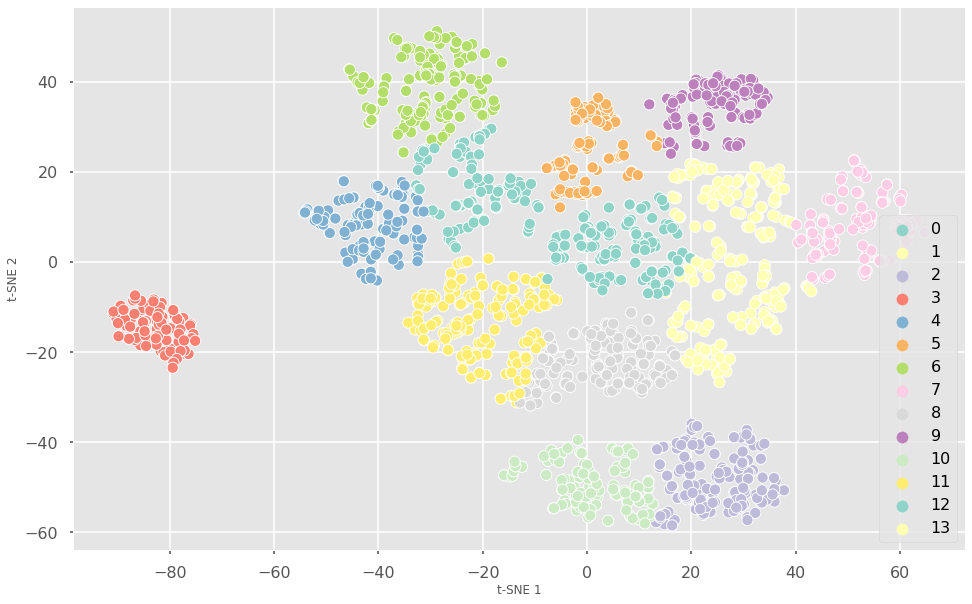

In [183]:
plt.figure(figsize=(16, 10))
#sns.set_palette("pastel")
sns.scatterplot(x=tsne[:,0], y=tsne[:,1], hue=kmeans.labels_, palette = 'Set3')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

In [179]:
# Hyperparamter tuning
for size in range(2, 15):
    kmeans = KMeans(n_clusters=size).fit(tsne)
    
    score = silhouette_score(tsne, kmeans.labels_, metric="sqeuclidean")
    print("At size", size, "the score is", score)

At size 2 the score is 0.558647387284616
At size 3 the score is 0.608544728035098
At size 4 the score is 0.6338655176134207
At size 5 the score is 0.6169034104202636
At size 6 the score is 0.6185869408417961
At size 7 the score is 0.623379501670261
At size 8 the score is 0.6233819097700704
At size 9 the score is 0.6418385915554753
At size 10 the score is 0.6373427915418306
At size 11 the score is 0.6479303615295664
At size 12 the score is 0.6613671577325383
At size 13 the score is 0.6655733216763182
At size 14 the score is 0.6711254942694495


In [184]:
score = silhouette_score(tsne, kmeans.labels_, metric="sqeuclidean")
print(score)

0.6710020131086151


In [185]:
kmeans.labels_.T.shape

(1981,)

In [186]:
# Add the labels back to the original df
df_dropped['LABEL'] = kmeans.labels_

In [187]:
df_dropped

TITLE              REGION             SPECIFIC REGION  \
0           Sawtooth Ridge  Eastern Washington  Palouse and Blue Mountains   
1        Rattlesnake Trail  Eastern Washington  Palouse and Blue Mountains   
2             Oregon Butte  Eastern Washington  Palouse and Blue Mountains   
3             Mount Misery  Eastern Washington  Palouse and Blue Mountains   
4             Dexter Ridge  Eastern Washington  Palouse and Blue Mountains   
...                    ...                 ...                         ...   
1976  Corral Pass Snowshoe  Mount Rainier Area      Chinook Pass - Hwy 410   
1977         Crofton Butte      South Cascades            Mount Adams Area   
1978           County Line   Snoqualmie Region      Salmon La Sac/Teanaway   
1979          Cooper River   Snoqualmie Region      Salmon La Sac/Teanaway   
1980          Chopper Peak  Central Washington                   Wenatchee   

      HIGHEST   LATITUDE   LONGITUDE  COAST  RIVERS  LAKES  WATERFALLS  \
0      5500.0  46.061784 -117.844133      0       0      0           0   
1      5700.0  46.204339 -117.705824      0       0      0           0   
2      6387.0  46.118332 -117.714965      0       0      0           0   
3      6401.0  46.118201 -117.714360      0       0      0           0   
4      5500.0  46.021522 -117.790014      0       1      0           0   
...       ...        ...         ...    ...     ...    ...         ...   
1976   5700.0  46.999456 -121.528358      0       0      0           0   
1977   4750.0  46.121600 -121.561217      0       0      0           0   
1978   5700.0  47.359271 -120.691928      0       0      0           0   
1979   2800.0  47.409338 -121.106670      0       1      1           0   
1980   2400.0  47.399304 -120.395672      0       1      0           0   

      OLD GROWTH  FALL FOLIAGE  WILDFLOWERS/MEADOWS  MOUNTAIN VIEWS  SUMMITS  \
0              0             0                    1               1        0   
1              0             0                    1               1        1   
2              0             0                    1               1        1   
3              0             0                    1               1        1   
4              0             0                    0               0        0   
...          ...           ...                  ...             ...      ...   
1976           0             0                    1               1        1   
1977           0             0                    1               1        0   
1978           0             0                    1               1        0   
1979           1             1                    1               1        0   
1980           0             0                    0               0        1   

      WILDLIFE  RIDGES  ESTABLISHED CAMPSITES            DIFFICULTY  LABEL  
0            0       1                      0              moderate     11  
1            0       1                      1        very strenuous      0  
2            1       1                      1  moderately strenuous      0  
3            1       1                      1             strenuous      0  
4            0       0                      0        very strenuous      9  
...        ...     ...                    ...                   ...    ...  
1976         0       0                      0        very strenuous      6  
1977         0       0                      0              moderate      5  
1978         0       1                      0             strenuous     11  
1979         1       0                      1              moderate      8  
1980         0       0                      0              moderate      6  

[1981 rows x 20 columns]

In [188]:
# Save the labled df to csv file 
df_dropped.to_csv("labeled_hikes.csv")

### DBSCAN

In [189]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

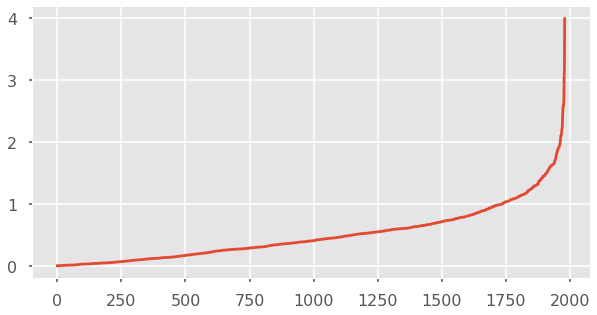

In [190]:
# Picking epsilon
plt.figure(figsize=(10,5))
nn = NearestNeighbors(n_neighbors=5).fit(tsne)
distances, idx = nn.kneighbors(tsne)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()

Elblow is around 1.5

In [191]:
dbscan = DBSCAN(eps=1.2, min_samples=1).fit(tsne)

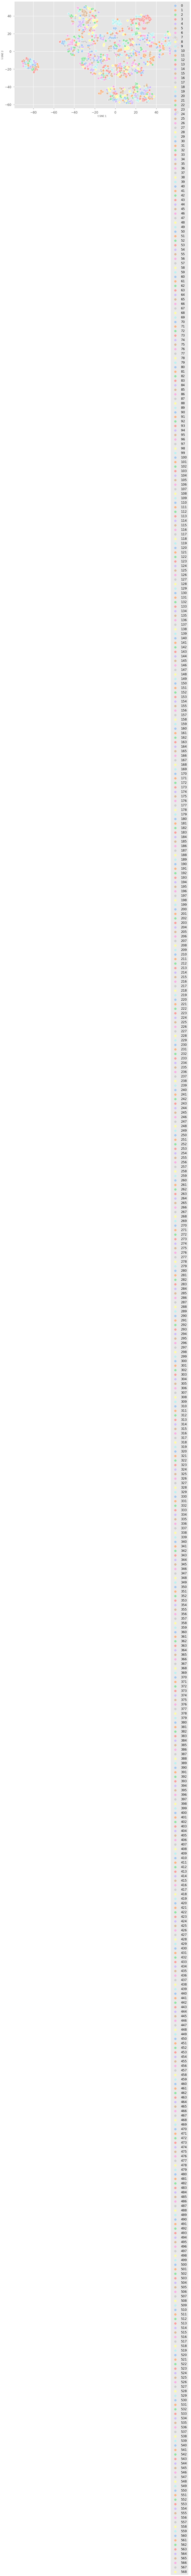

In [192]:
plt.figure(figsize=(16, 10))
sns.scatterplot(x=tsne[:,0], y=tsne[:,1], hue=dbscan.labels_, palette="pastel")
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

In [177]:
score = silhouette_score(tsne, dbscan.labels_, metric="sqeuclidean")
print("The silhouette score is:", score)

The silhouette score is: 0.6071327007560657


In [437]:
# Try some hyperparameter tuning
for eps in np.arange(0.2, 3, 0.1):
    for minsamp in range(1, 5):
        dbscan = DBSCAN(eps=eps, min_samples=minsamp).fit(tsne)
        score = silhouette_score(tsne, dbscan.labels_, metric="sqeuclidean")
        print("The silhouette score is:", score, " with eps of ", eps, "and min_samp", minsamp)

The silhouette score is: 0.27285337908705853  with eps of  0.2 and min_samp 1
The silhouette score is: -0.43015702645416865  with eps of  0.2 and min_samp 2
The silhouette score is: -0.8674453418518074  with eps of  0.2 and min_samp 3
The silhouette score is: -0.5209699974894421  with eps of  0.2 and min_samp 4
The silhouette score is: 0.36491772479363493  with eps of  0.30000000000000004 and min_samp 1
The silhouette score is: -0.21764660964525448  with eps of  0.30000000000000004 and min_samp 2
The silhouette score is: -0.7843767015382128  with eps of  0.30000000000000004 and min_samp 3
The silhouette score is: -0.8578927039453866  with eps of  0.30000000000000004 and min_samp 4
The silhouette score is: 0.44180459133511446  with eps of  0.4000000000000001 and min_samp 1
The silhouette score is: -0.017135450363951317  with eps of  0.4000000000000001 and min_samp 2
The silhouette score is: -0.617876360547643  with eps of  0.4000000000000001 and min_samp 3
The silhouette score is: -0.86

The silhouette score is: 0.33122951491378166  with eps of  2.500000000000001 and min_samp 1
The silhouette score is: 0.3722246987762546  with eps of  2.500000000000001 and min_samp 2
The silhouette score is: 0.4141380340662294  with eps of  2.500000000000001 and min_samp 3
The silhouette score is: 0.4508143624515893  with eps of  2.500000000000001 and min_samp 4
The silhouette score is: 0.3008022626005302  with eps of  2.600000000000001 and min_samp 1
The silhouette score is: 0.32994848827632106  with eps of  2.600000000000001 and min_samp 2
The silhouette score is: 0.4175432843512143  with eps of  2.600000000000001 and min_samp 3
The silhouette score is: 0.4420131277680631  with eps of  2.600000000000001 and min_samp 4
The silhouette score is: 0.2400722374893039  with eps of  2.700000000000001 and min_samp 1
The silhouette score is: 0.2547510742738908  with eps of  2.700000000000001 and min_samp 2
The silhouette score is: 0.3721481944179568  with eps of  2.700000000000001 and min_samp

### Meanshift

In [193]:
from sklearn.cluster import MeanShift

In [194]:
meanshift = MeanShift(bandwidth=2).fit(tsne)

In [195]:
len(np.unique(meanshift.labels_))

333

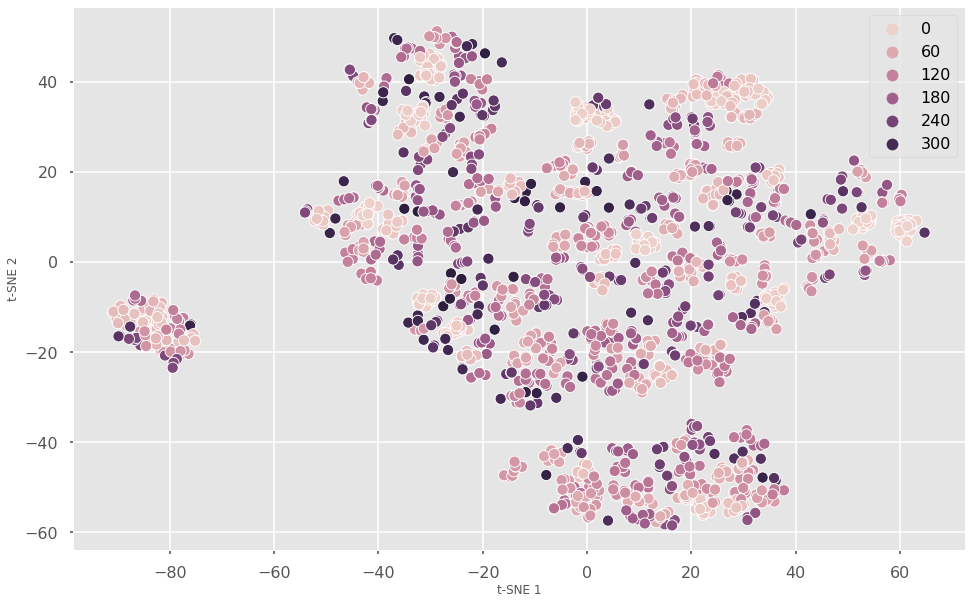

In [196]:
plt.figure(figsize=(16, 10))
sns.scatterplot(x=tsne[:,0], y=tsne[:,1], hue=meanshift.labels_)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

In [483]:
score = silhouette_score(tsne, meanshift.labels_, metric="sqeuclidean")
print("The silhouette score is:", score)

The silhouette score is: 0.6810489293178276


In [439]:
# Hyperparameter tuning
for i in range(1, 11):
    meanshift = MeanShift(bandwidth=i).fit(tsne)
    score = silhouette_score(tsne, meanshift.labels_, metric="sqeuclidean")
    print("bandwidth:", i, "score:", score)

bandwidth: 1 score: 0.678311440679295
bandwidth: 2 score: 0.6810489293178276
bandwidth: 3 score: 0.6174114650405291
bandwidth: 4 score: 0.5795977308302763
bandwidth: 5 score: 0.5689114769361229
bandwidth: 6 score: 0.5724759961346677
bandwidth: 7 score: 0.5605254866597174
bandwidth: 8 score: 0.5553358889978307
bandwidth: 9 score: 0.5954541445266326
bandwidth: 10 score: 0.557184280320605


### Spectral Clustering

O(n^3) 

:'(

In [367]:
from sklearn.cluster import SpectralClustering

In [402]:
sp = SpectralClustering(n_clusters = 6).fit(tsne)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
score = silhouette_score(X, sp.labels_, metric="sqeuclidean")
print("The silhouette score is:", score)

In [ ]:
plt.figure(figsize=(16, 10))
sns.scatterplot(x=tsne[:,0], y=tsne[:,1], hue=sp.labels_)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

### OPTICS

In [197]:
from sklearn.cluster import OPTICS

In [444]:
for eps in np.arange(2, 5, 0.1):
    for samp in range(2, 6):
        op = OPTICS(max_eps=eps, min_samples=samp).fit(tsne)
        score = silhouette_score(tsne, op.labels_, metric="sqeuclidean")
        print("score:", score, "samp:", samp, "eps", eps)

score: 0.5846974819967035 samp: 2 eps 2.0
score: 0.40853104579590704 samp: 3 eps 2.0
score: 0.30096594555385275 samp: 4 eps 2.0
score: 0.17143612535656472 samp: 5 eps 2.0
score: 0.5849594298187561 samp: 2 eps 2.1
score: 0.40743303420463683 samp: 3 eps 2.1
score: 0.2989166875890369 samp: 4 eps 2.1
score: 0.1986607189822745 samp: 5 eps 2.1
score: 0.5853855146245109 samp: 2 eps 2.2
score: 0.41029433488606715 samp: 3 eps 2.2
score: 0.30832980840644564 samp: 4 eps 2.2
score: 0.2323253203877791 samp: 5 eps 2.2
score: 0.5852369065295742 samp: 2 eps 2.3000000000000003
score: 0.40951090023958436 samp: 3 eps 2.3000000000000003
score: 0.31102804609629975 samp: 4 eps 2.3000000000000003
score: 0.24261629798303802 samp: 5 eps 2.3000000000000003
score: 0.5846865013462802 samp: 2 eps 2.4000000000000004
score: 0.4077136401220011 samp: 3 eps 2.4000000000000004
score: 0.3159362455922706 samp: 4 eps 2.4000000000000004
score: 0.2605818222348839 samp: 5 eps 2.4000000000000004
score: 0.5844245526373751 samp:

In [198]:
op = OPTICS(min_samples=2, max_eps=2.2).fit(tsne)

In [199]:
score = silhouette_score(tsne, op.labels_, metric="sqeuclidean")
print("The silhouette score is:", score)

The silhouette score is: 0.5853855146245109


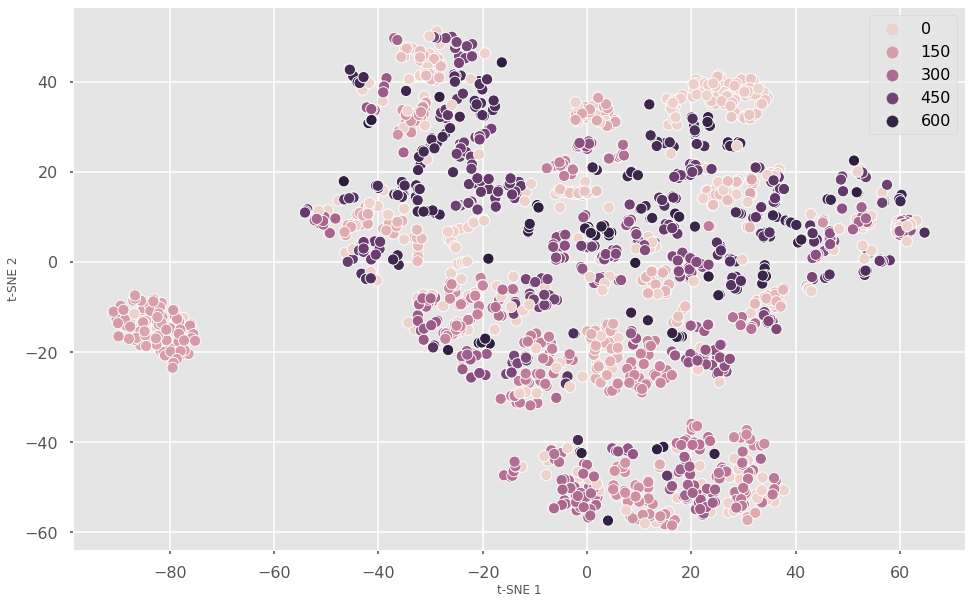

In [200]:
plt.figure(figsize=(16, 10))
sns.scatterplot(x=tsne[:,0], y=tsne[:,1], hue=op.labels_)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

### Affinity Propagation

In [171]:
from sklearn.cluster import AffinityPropagation

In [172]:
ap = AffinityPropagation(damping=0.95, random_state=0).fit(tsne)

In [173]:
len(np.unique(ap.labels_))

29

In [174]:
score = silhouette_score(tsne, ap.labels_, metric="sqeuclidean")
print("The silhouette score is:", score)

The silhouette score is: 0.6024827862987798


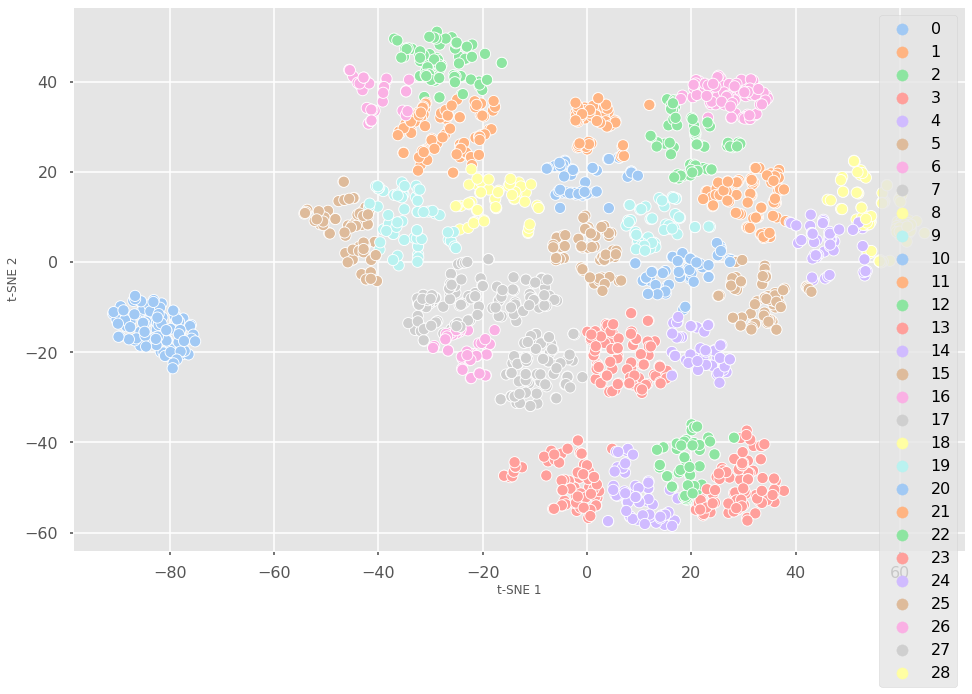

In [175]:
plt.figure(figsize=(16, 10))
sns.scatterplot(x=tsne[:,0], y=tsne[:,1], hue=ap.labels_, palette='pastel')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

# Some more plot generation below

In [108]:
# Function  to get teh avg rating per hike region 
def isNaN(num):
    return num != num
def get_avg_rating_subregion(region):
    ratings={}
    subregions = df[df["REGION"] == region]["SPECIFIC REGION"].unique()
    subregions = [x for x in subregions if not isNaN(x)]
    for region in subregions:
        avg = df[df["SPECIFIC REGION"] == region]['RATING'].mean()
        ratings[region] = avg
    return ratings
def plot(dictionary, save_name):
    style.use('seaborn-poster') #sets the size of the charts
    style.use('ggplot')
    res = pd.DataFrame(dictionary.items(), columns=['region', 'avg'])
    fig = plt.figure(figsize=(14,8))
    labels = [ '\n'.join(wrap(l, 17)) for l in res.region]
    ax = res.plot.bar(legend=None, color='darkgreen')
    ax.set_xticklabels(labels)
    plt.ylim(1, 4)
    plt.yticks(np.arange(1, 4, 0.2))
    plt.ylabel("Average rating")
    plt.xticks(ha='center', rotation=0)
    plt.show()
    ax.figure.savefig('%s.png' %save_name)

Eastern Washington


<Figure size 1008x576 with 0 Axes>

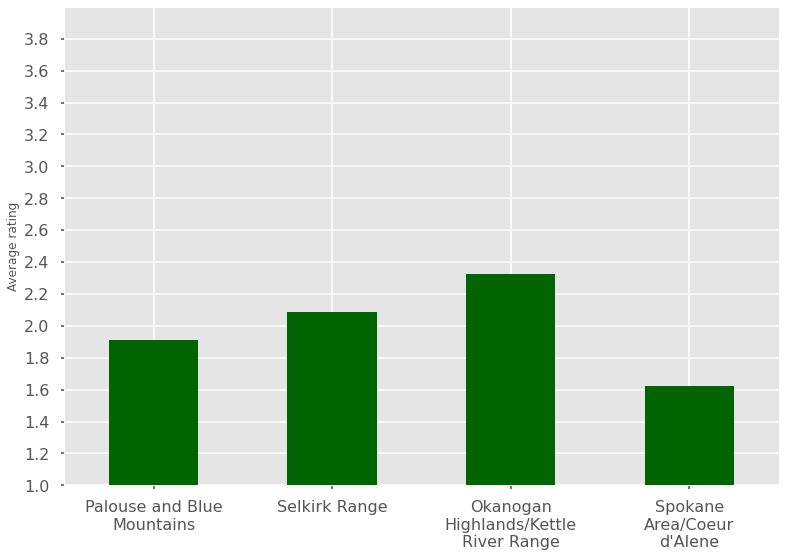

Snoqualmie Region


<Figure size 1008x576 with 0 Axes>

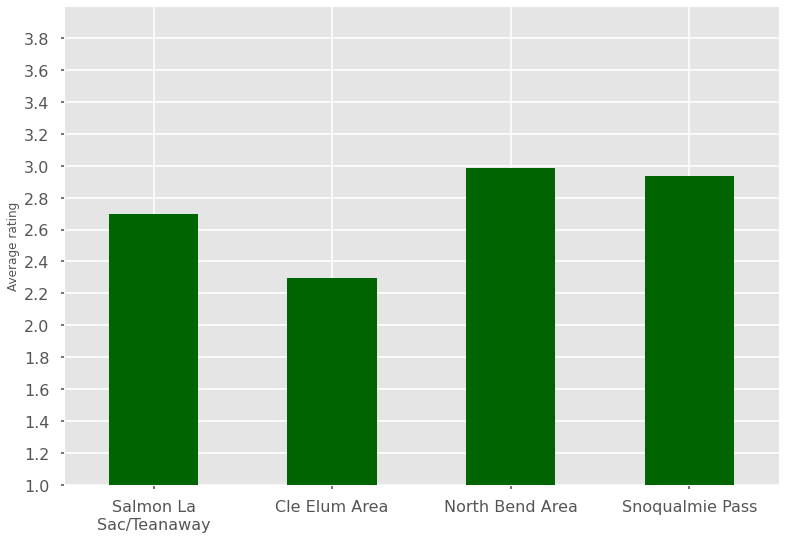

Central Washington


<Figure size 1008x576 with 0 Axes>

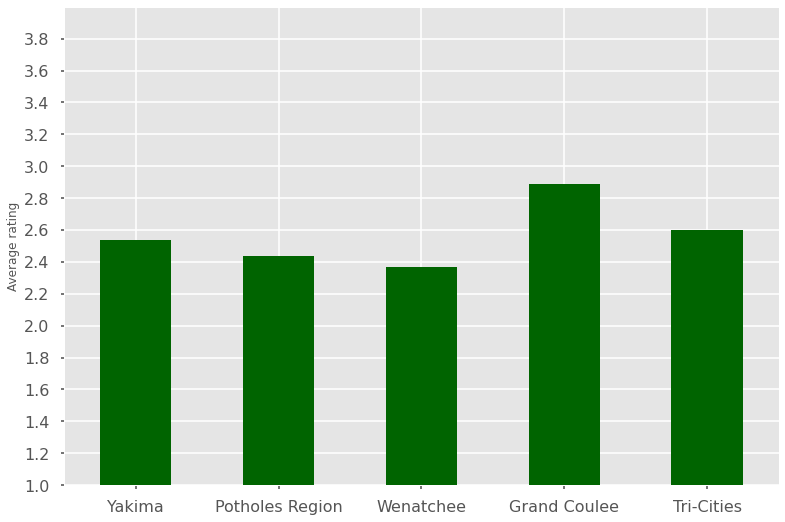

Southwest Washington


<Figure size 1008x576 with 0 Axes>

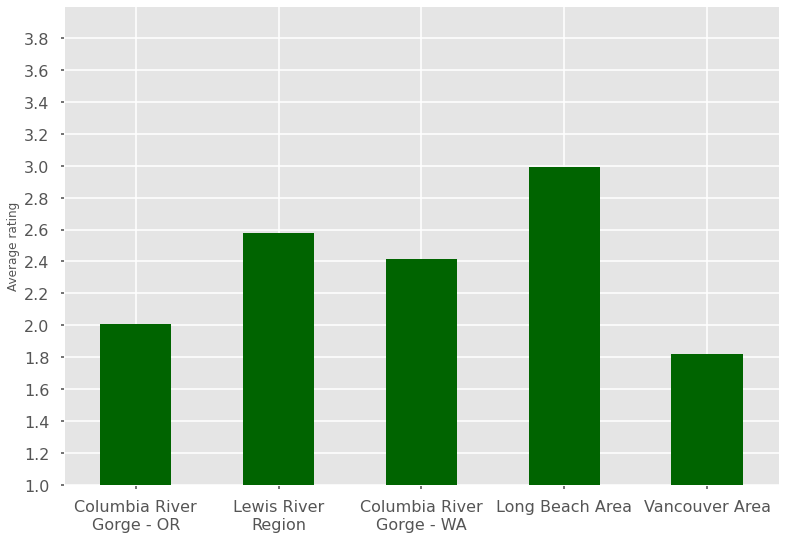

South Cascades


<Figure size 1008x576 with 0 Axes>

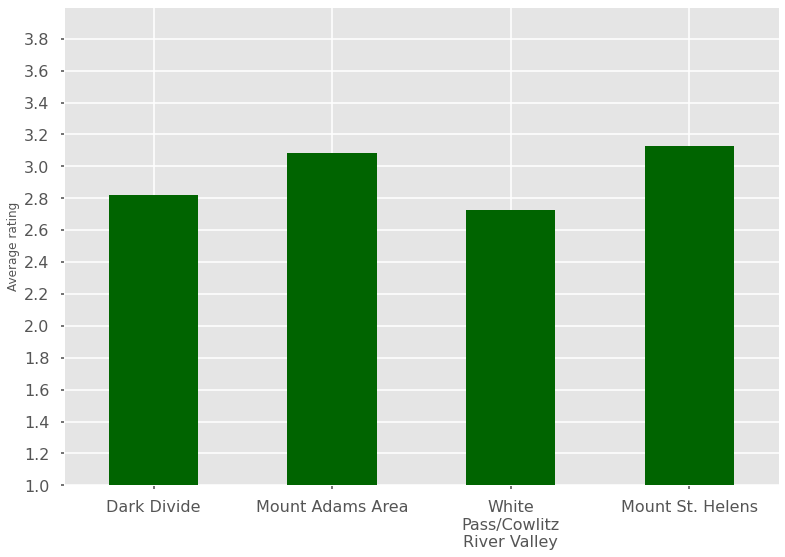

North Cascades


<Figure size 1008x576 with 0 Axes>

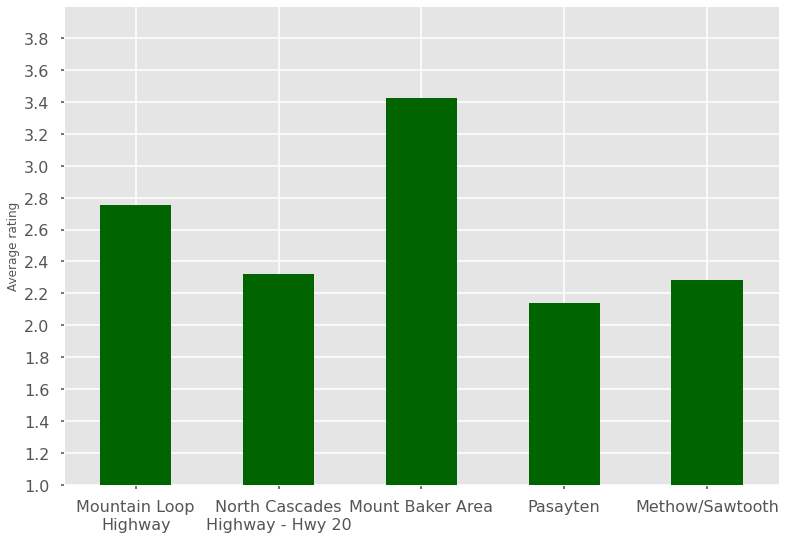

Olympic Peninsula


<Figure size 1008x576 with 0 Axes>

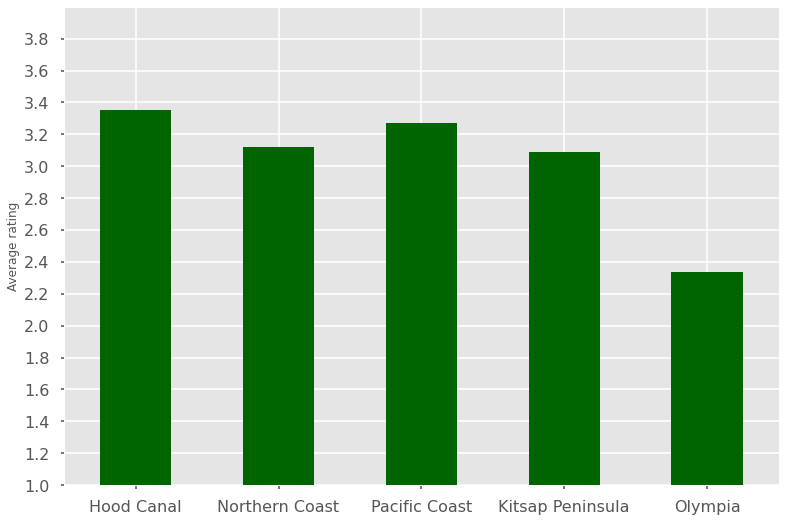

Central Cascades


<Figure size 1008x576 with 0 Axes>

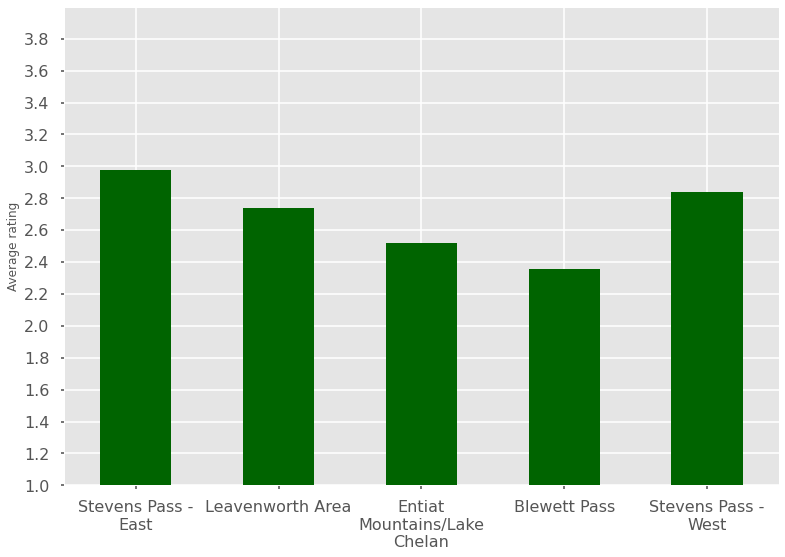

Puget Sound and Islands


<Figure size 1008x576 with 0 Axes>

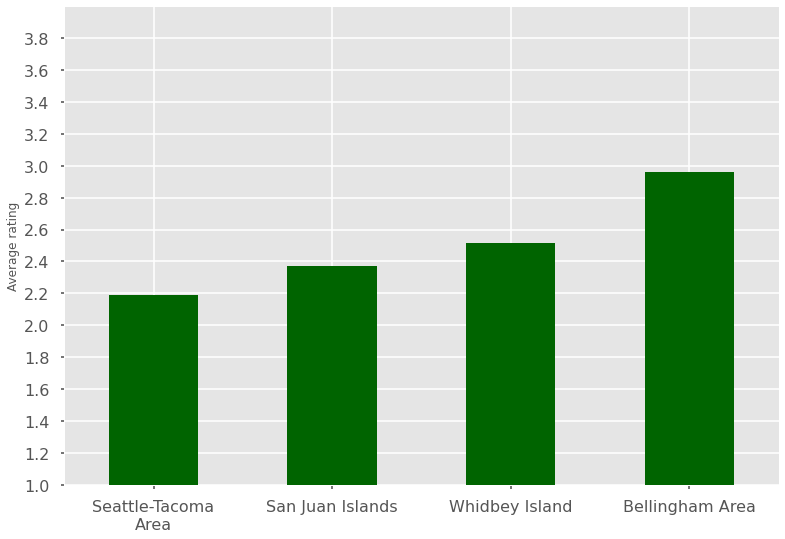

Issaquah Alps


<Figure size 1008x576 with 0 Axes>

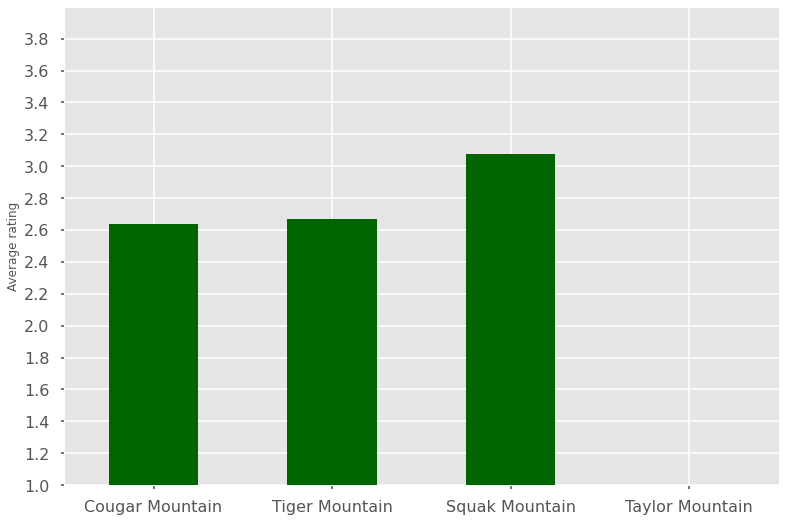

Mount Rainier Area


<Figure size 1008x576 with 0 Axes>

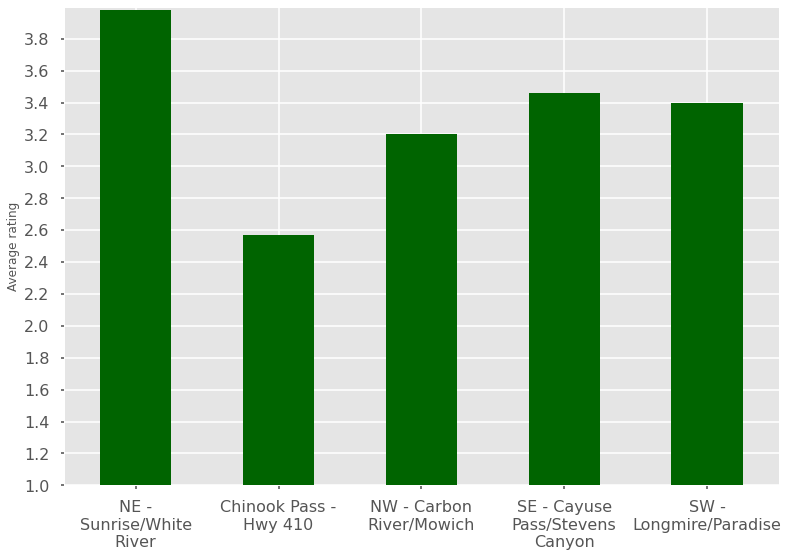

In [103]:
for region in df.REGION.unique():
    dic = get_avg_rating_subregion(region)
    print(region)
    plot(dic, region)

In [212]:
df_dropped[df_dropped['LABEL'] == 10]

TITLE              REGION  \
30             North Fork Bridge Creek    Central Cascades   
32    Upper Stehekin Valley Road Trail    Central Cascades   
51         West Fork Dosewallips River   Olympic Peninsula   
60                           Trap Pass    Central Cascades   
70                Wilderness Peak Loop       Issaquah Alps   
...                                ...                 ...   
1890                    Carbon Glacier  Mount Rainier Area   
1894    West Fork Foss River and Lakes    Central Cascades   
1898                   Upper Lena Lake   Olympic Peninsula   
1911        Surprise and Glacier Lakes    Central Cascades   
1918  Lower South Fork Skokomish River   Olympic Peninsula   

                   SPECIFIC REGION  HIGHEST   LATITUDE   LONGITUDE  COAST  \
30    Entiat Mountains/Lake Chelan   4099.0  48.461381 -120.839744      0   
32    Entiat Mountains/Lake Chelan   2400.0  48.380724 -120.840310      0   
51                      Hood Canal   3600.0  47.743426 -123.203251      0   
60             Stevens Pass - West   5800.0  47.709314 -121.106560      0   
70                 Cougar Mountain   1598.0  47.509317 -122.090378      0   
...                            ...      ...        ...         ...    ...   
1890      NW - Carbon River/Mowich   3500.0  46.994945 -121.915428      0   
1894           Stevens Pass - West   4900.0  47.634883 -121.303567      0   
1898                    Hood Canal   4600.0  47.600871 -123.145585      0   
1911           Stevens Pass - West   4900.0  47.707800 -121.156700      0   
1918                       Olympia    900.0  47.419050 -123.329667      0   

      RIVERS  LAKES  WATERFALLS  OLD GROWTH  FALL FOLIAGE  \
30         1      1           1           0             0   
32         1      0           1           1             1   
51         1      0           1           1             1   
60         0      1           1           0             0   
70         0      0           1           1             1   
...      ...    ...         ...         ...           ...   
1890       1      0           1           1             0   
1894       1      1           1           1             0   
1898       0      1           1           1             0   
1911       0      1           1           1             0   
1918       1      0           1           0             0   

      WILDFLOWERS/MEADOWS  MOUNTAIN VIEWS  SUMMITS  WILDLIFE  RIDGES  \
30                      1               1        0         1       0   
32                      1               1        0         0       0   
51                      1               1        0         0       0   
60                      1               1        0         0       1   
70                      1               0        1         1       1   
...                   ...             ...      ...       ...     ...   
1890                    1               1        0         0       0   
1894                    0               1        0         0       0   
1898                    1               1        0         1       0   
1911                    0               1        0         0       0   
1918                    0               1        0         1       0   

      ESTABLISHED CAMPSITES            DIFFICULTY  LABEL  
30                        1             strenuous     10  
32                        1        very strenuous     10  
51                        1        very strenuous     10  
60                        0        very strenuous     10  
70                        0              moderate     10  
...                     ...                   ...    ...  
1890                      1        very strenuous     10  
1894                      1        very strenuous     10  
1898                      1        very strenuous     10  
1911                      1        very strenuous     10  
1918                      1  moderately strenuous     10  

[124 rows x 20 columns]